## Series de tiempo

El análisis de series de tiempo se suele utilizar para proyectar o pronosticar la evolución de una variable a lo largo del tiempo, a partir de información previa sobre esa misma variable. Es decir, tenemos que proyectar (plotear) una variable determinada (eje y) en función del tiempo (eje x).

## Componentes

![](tendenciaEstacionalidadVolatilidad.png)

## Tendencia

Cuando estudiamos regresiones lineales vimos los conceptos intercepto y pendiente o tendencia:

El intercepto y la tendencia son términos utilizados en estadística y análisis de datos para describir una relación lineal entre dos variables.

El intercepto se refiere a la intersección de una línea recta con el eje Y (o vertical) en un gráfico de coordenadas. Matemáticamente, se puede describir como el valor de Y para cuando X es igual a cero. En una ecuación de línea recta, el intercepto se representa como b en la fórmula Y = mX + b, donde m es la pendiente o tasa de cambio de la línea recta.

La tendencia, por otro lado, se refiere a la dirección general de la línea recta en un gráfico. Puede ser positiva (la línea recta se inclina hacia arriba), negativa (la línea recta se inclina hacia abajo) o nula (la línea recta es horizontal). La tendencia se representa matemáticamente como la pendiente de la línea recta en la ecuación Y = mX + b.

El intercepto y la tendencia son importantes porque pueden ayudar a describir y entender la relación entre dos variables. Por ejemplo, si una línea recta tiene un intercepto positivo y una tendencia positiva, significa que la relación entre las dos variables es positiva y aumenta con el tiempo. Por el contrario, si una línea recta tiene un intercepto negativo y una tendencia negativa, significa que la relación entre las dos variables es negativa y disminuye con el tiempo.

![](media_estacionaria.png)

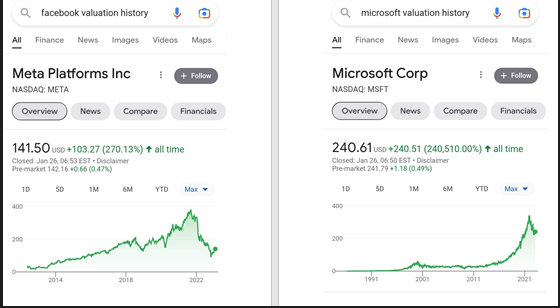

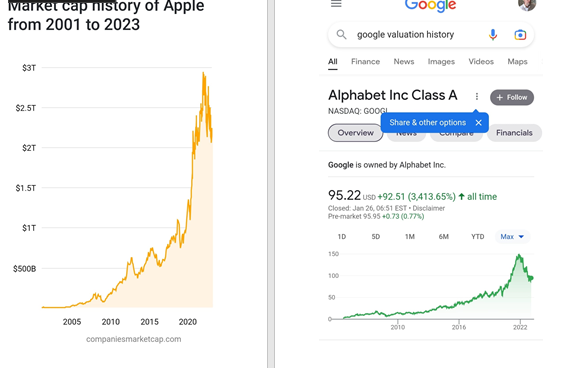

## Estacionalidad

Otro patrón importante de las series de tiempo es la estacionalidad. Son fluctuaciones periódicas en el tiempo, o sea, que se repiten cada cierto tiempo, horas, días, meses o años. Por ejemplo, toda la actividad económica de un país cambia en los meses de verano, provocando un patrón estacional.

![](seriestiempo.png)

### ¿Qué diferencia hay entre el componente estacional y el componente cíclico?

El componente estacional se refiere a las fluctuaciones regulares de una variable económica o estadística que ocurren en un período específico del año, mientras que el componente cíclico se refiere a fluctuaciones más amplias y menos regulares que ocurren a lo largo de varios años.

## Volatilidad (Varianza, ruido, error)

La volatilidad en una serie de tiempo se refiere a la medida de la variabilidad o fluctuación de los datos en una serie temporal. Es una medida estadística que indica cuán dispares son los valores de una serie temporal en comparación con su promedio. Es comúnmente utilizado en análisis financiero, económico y estadístico para medir el riesgo asociado a una inversión o un activo, ya que una serie temporal con una volatilidad alta indica que los precios cambian con mayor frecuencia y amplitud que una con una volatilidad baja.

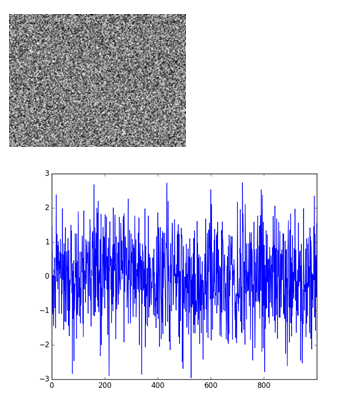 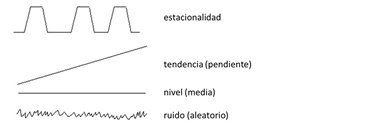

#### Es importante separar la tendencia y la estacionalidad y la volatilidad en las series de tiempo, para modelar correctamente estos sistemas.

# Ejercicio
- Crear una serie de tiempo con los siguientes 3 componentes:
- Tendencia Y0 = m * X + b, siendo M = 0.3 y b = 10
- Estacionalidad Y1 = sin(0.1 * X)
- Volatilidad Y2 = random, siendo random un número aleatorio (distribución, media y desviación a elegir)
- Dibuja en pantalla la serie de tiempo de los 100 primeros valores de X (entre 0 y 100)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

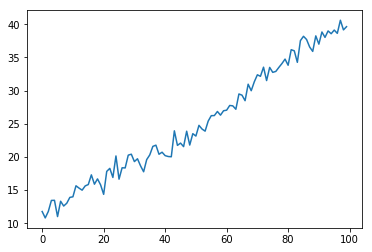

In [2]:
# Parámetros
m = 0.3
b = 10

# Tendencia lineal
X = np.arange(0, 100)
Y0 = m * X + b

# Estacionalidad
Y1 = np.sin(0.1 * X)

# Volatilidad
np.random.seed(0)
Y2 = np.random.normal(0, 1, 100)

# Serie de tiempo total
Y = Y0 + Y1 + Y2

# Gráfica
plt.plot(X, Y)
plt.show()

# Predicción

En la primera parte de esta clase vamos a usar series de tiempo para predecir las ventas de medicamentos para diabetes en Australia (dataset en el fichero a10.csv).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [3]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
filename = "../../dataScience/talleres/clase28-SeriesDeTiempo/ds_10.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="value",
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="bokeh",
    max_rows_analyzed=20000,
    max_cols_analyzed=20,
)

ModuleNotFoundError: No module named 'autoviz'

Creamos nuestro DataFrame y hacemos un ploteo inicial:

In [5]:
df = pd.read_csv('ds_10.csv', parse_dates=['date'], index_col='date')
df.head(3)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221


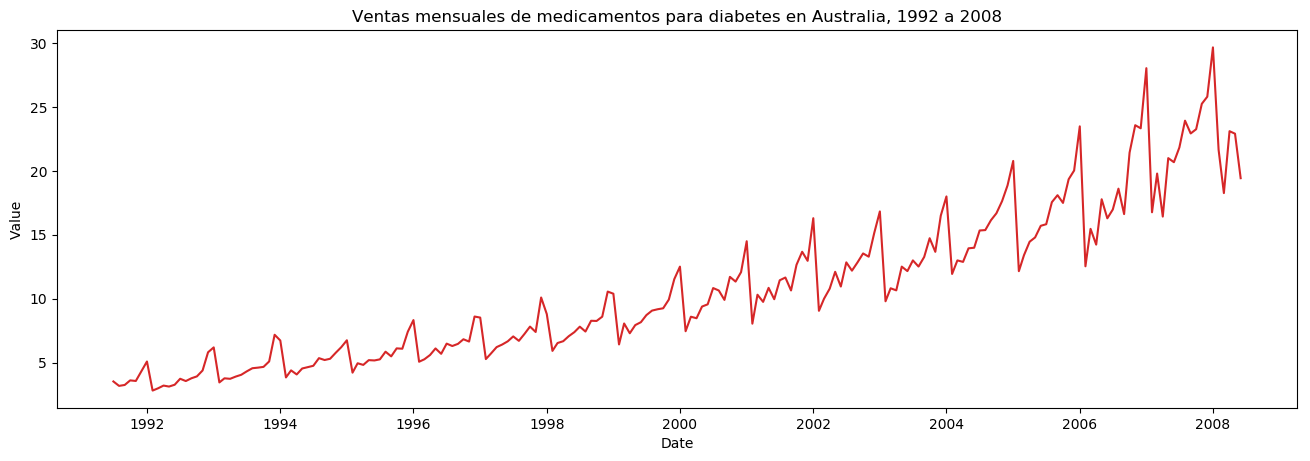

In [2]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df, x=df.index, y=df.value, title='Ventas mensuales de medicamentos para diabetes en Australia, 1992 a 2008')

In [3]:
# Exploramos las primeras 5 observaciones de nuestro df:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


### Moving Average

El Moving Average (MA) es una técnica estadística utilizada para suavizar los datos de una serie temporal. Esto significa que se utiliza para reducir el ruido y la variabilidad en los datos y hacerlos más fáciles de analizar. El MA se calcula tomando un conjunto de datos de una serie temporal y calculando el promedio de esos datos.

Hay diferentes tipos de Moving Average, pero el más común es el Simple Moving Average (SMA), que se calcula tomando un número específico de puntos de datos consecutivos (conocido como ventana) y calculando el promedio de esos puntos. Por ejemplo, si se utiliza una ventana de 3, el SMA se calcularía tomando los últimos 3 puntos de datos y calculando su promedio.

El MA se utiliza comúnmente en análisis técnico de mercados financieros para identificar tendencias y señales de compra y venta en los precios de un activo. También se utiliza en la industria para suavizar los datos de producción y demanda. Sin embargo, es importante mencionar que el MA puede suavizar demasiado los datos y eliminar información valiosa, por lo que se recomienda utilizarlo junto con otras técnicas de análisis.

### Calcular el Moving Average de un DataFrame

Podemos calcular el Moving Average (MA) de un DataFrame de Pandas en Python utilizando la función rolling() y el método mean() de la siguiente manera:

In [4]:
# Calcular el Moving Average con una ventana de 3
df['MA_3'] = df['value'].rolling(window=3).mean()

# Calcular el Moving Average con una ventana de 5
df['MA_15'] = df['value'].rolling(window=15).mean()

# Imprimir el DataFrame para verificar los cambios
print(df)

                value       MA_3      MA_15
date                                       
1991-07-01   3.526591        NaN        NaN
1991-08-01   3.180891        NaN        NaN
1991-09-01   3.252221   3.319901        NaN
1991-10-01   3.611003   3.348038        NaN
1991-11-01   3.565869   3.476364        NaN
1991-12-01   4.306371   3.827748        NaN
1992-01-01   5.088335   4.320192        NaN
1992-02-01   2.814520   4.069742        NaN
1992-03-01   2.985811   3.629555        NaN
1992-04-01   3.204780   3.001704        NaN
1992-05-01   3.127578   3.106056        NaN
1992-06-01   3.270523   3.200960        NaN
1992-07-01   3.737851   3.378651        NaN
1992-08-01   3.558776   3.522383        NaN
1992-09-01   3.777202   3.691276   3.533888
1992-10-01   3.924490   3.753489   3.560415
1992-11-01   4.386531   4.029408   3.640791
1992-12-01   5.810549   4.707190   3.811346
1993-01-01   6.192068   5.463049   3.983417
1993-02-01   3.450857   5.151158   3.975749
1993-03-01   3.772307   4.471744

Aquí se calcula el moving average de la columna 'value' con una ventana de 3 y 15. Se crean dos nuevas columnas en el DataFrame llamadas 'MA_3' y 'MA_15' y se les asignan los valores del moving average. El método rolling() permite calcular la media movil de una serie temporal, la ventana es el número de datos que se consideran para calcular el promedio.

Ten en cuenta que los valores de las primeras filas de las nuevas columnas pueden ser NaN ya que no hay suficientes datos para calcular el promedio. Si quieres eliminar las filas con valores NaN debes utilizar el método dropna() en el DataFrame.

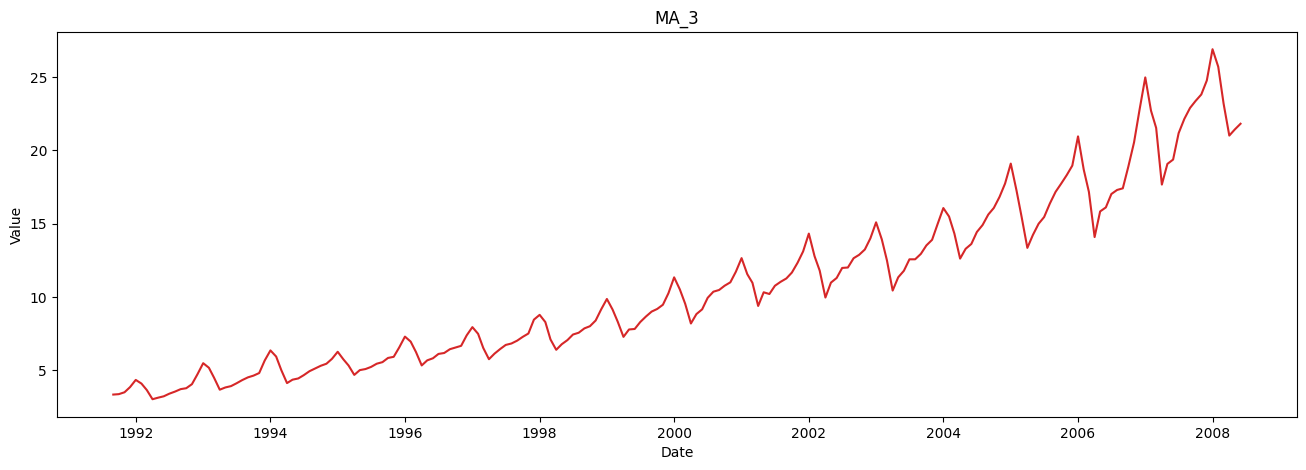

In [591]:
plot_df(df, x=df.index, y=df['MA_3'], title='MA_3')

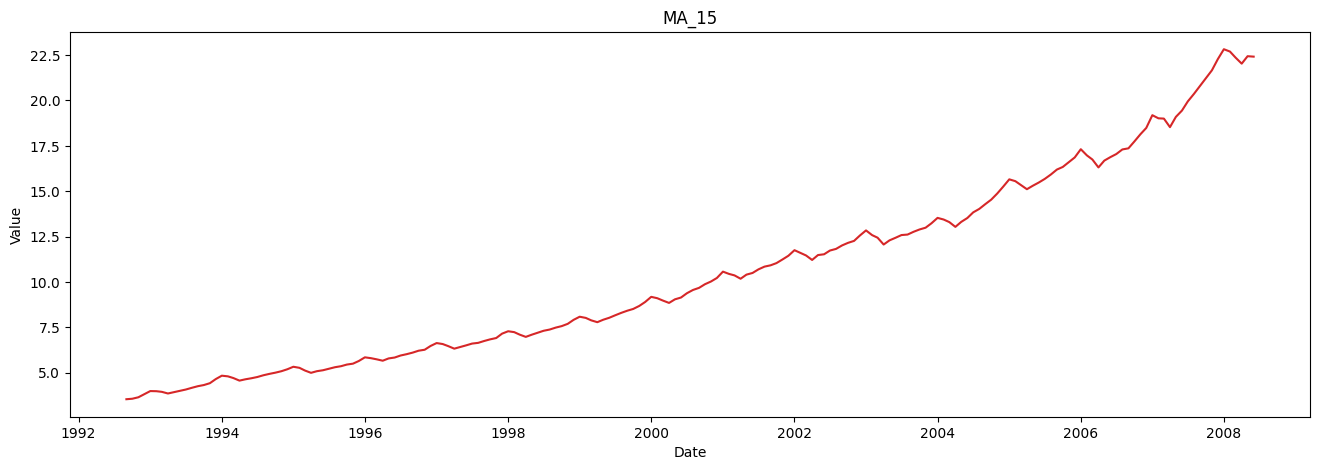

In [592]:
plot_df(df, x=df.index, y=df['MA_15'], title='MA_15')

##### Ploteamos la estacionalidad

La estacionalidad es la repetición de determinadas variaciones en alguna variable cada cierto período, normalmente igual o menor a un año. En períodos más amplios se suele hablar de ciclos.

In [3]:
# Preparamos los datos:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

NameError: name 'df' is not defined

In [594]:
# Preparamos los colores:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

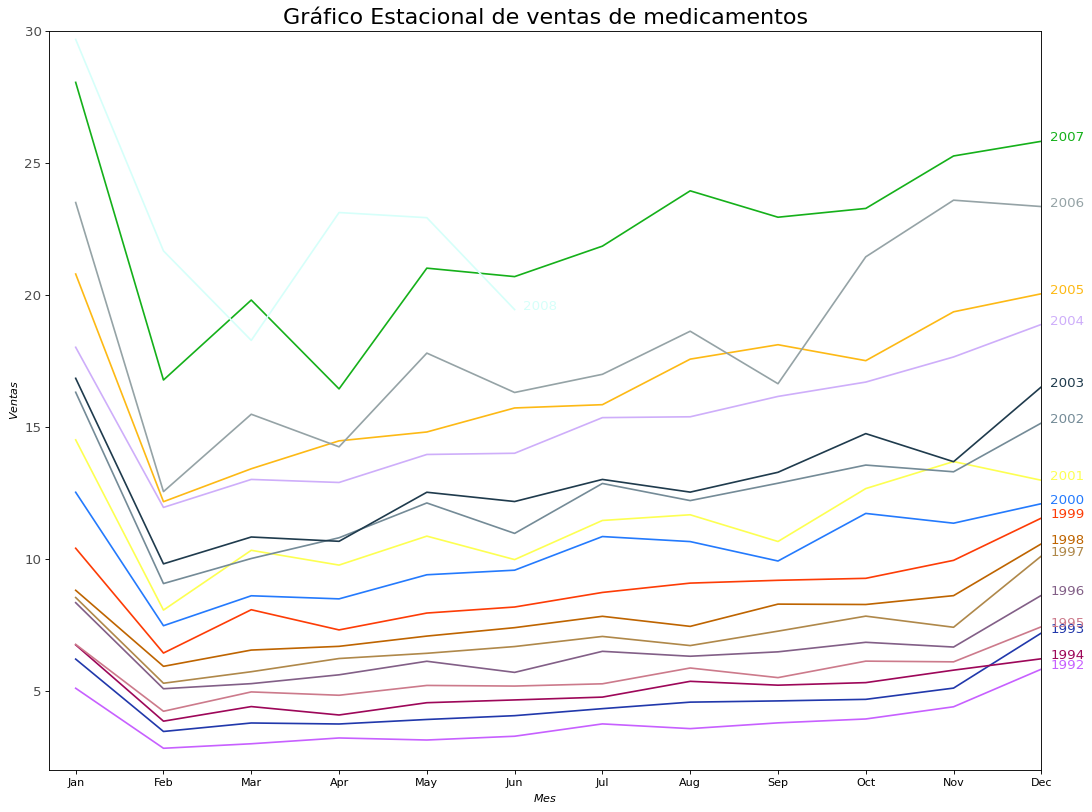

In [595]:
# Ploteamos
plt.figure(figsize=(16, 12), dpi=80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# matplotlib.pyplot.gca
# The gca() function in pyplot module of matplotlib library is used to get the current Axes instance on the current figure
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Ventas$', xlabel='$Mes$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Gráfico Estacional de ventas de medicamentos", fontsize=20)
plt.show()

## BoxPlot

A boxplot is a graphical and standardised way to display the distribution of data based on five key numbers:

 - “minimum”
 - 1st Quartile (25th percentile)
 - median (2nd Quartile/ 50th Percentile)
 - 3rd Quartile (75th percentile)
 - “maximum”

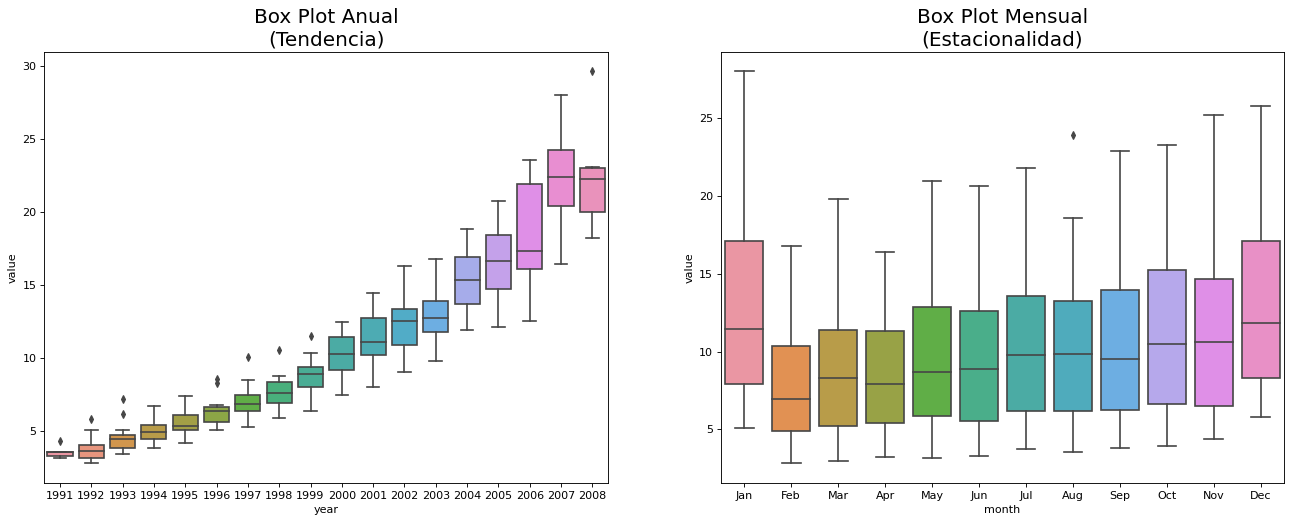

In [596]:
# The seaborn boxplot is a very basic plot Boxplots are used to visualize distributions.
# Thats very useful when you want to compare data between two groups.

# Definimos los plots:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Seteamos los títulos:
axes[0].set_title('Box Plot Anual\n(Tendencia)', fontsize=18); 
axes[1].set_title('Box Plot Mensual\n(Estacionalidad)', fontsize=18)
plt.show()

***

### Código de Python para la descomposición de series temporales en sus componentes

El código de Python para la descomposición de series temporales en sus componentes se puede encontrar en la biblioteca statsmodels, que tiene un método season_decompose() que se puede usar para descomponer una serie temporal en tendencia, estacionalidad y ruido en una línea de código.

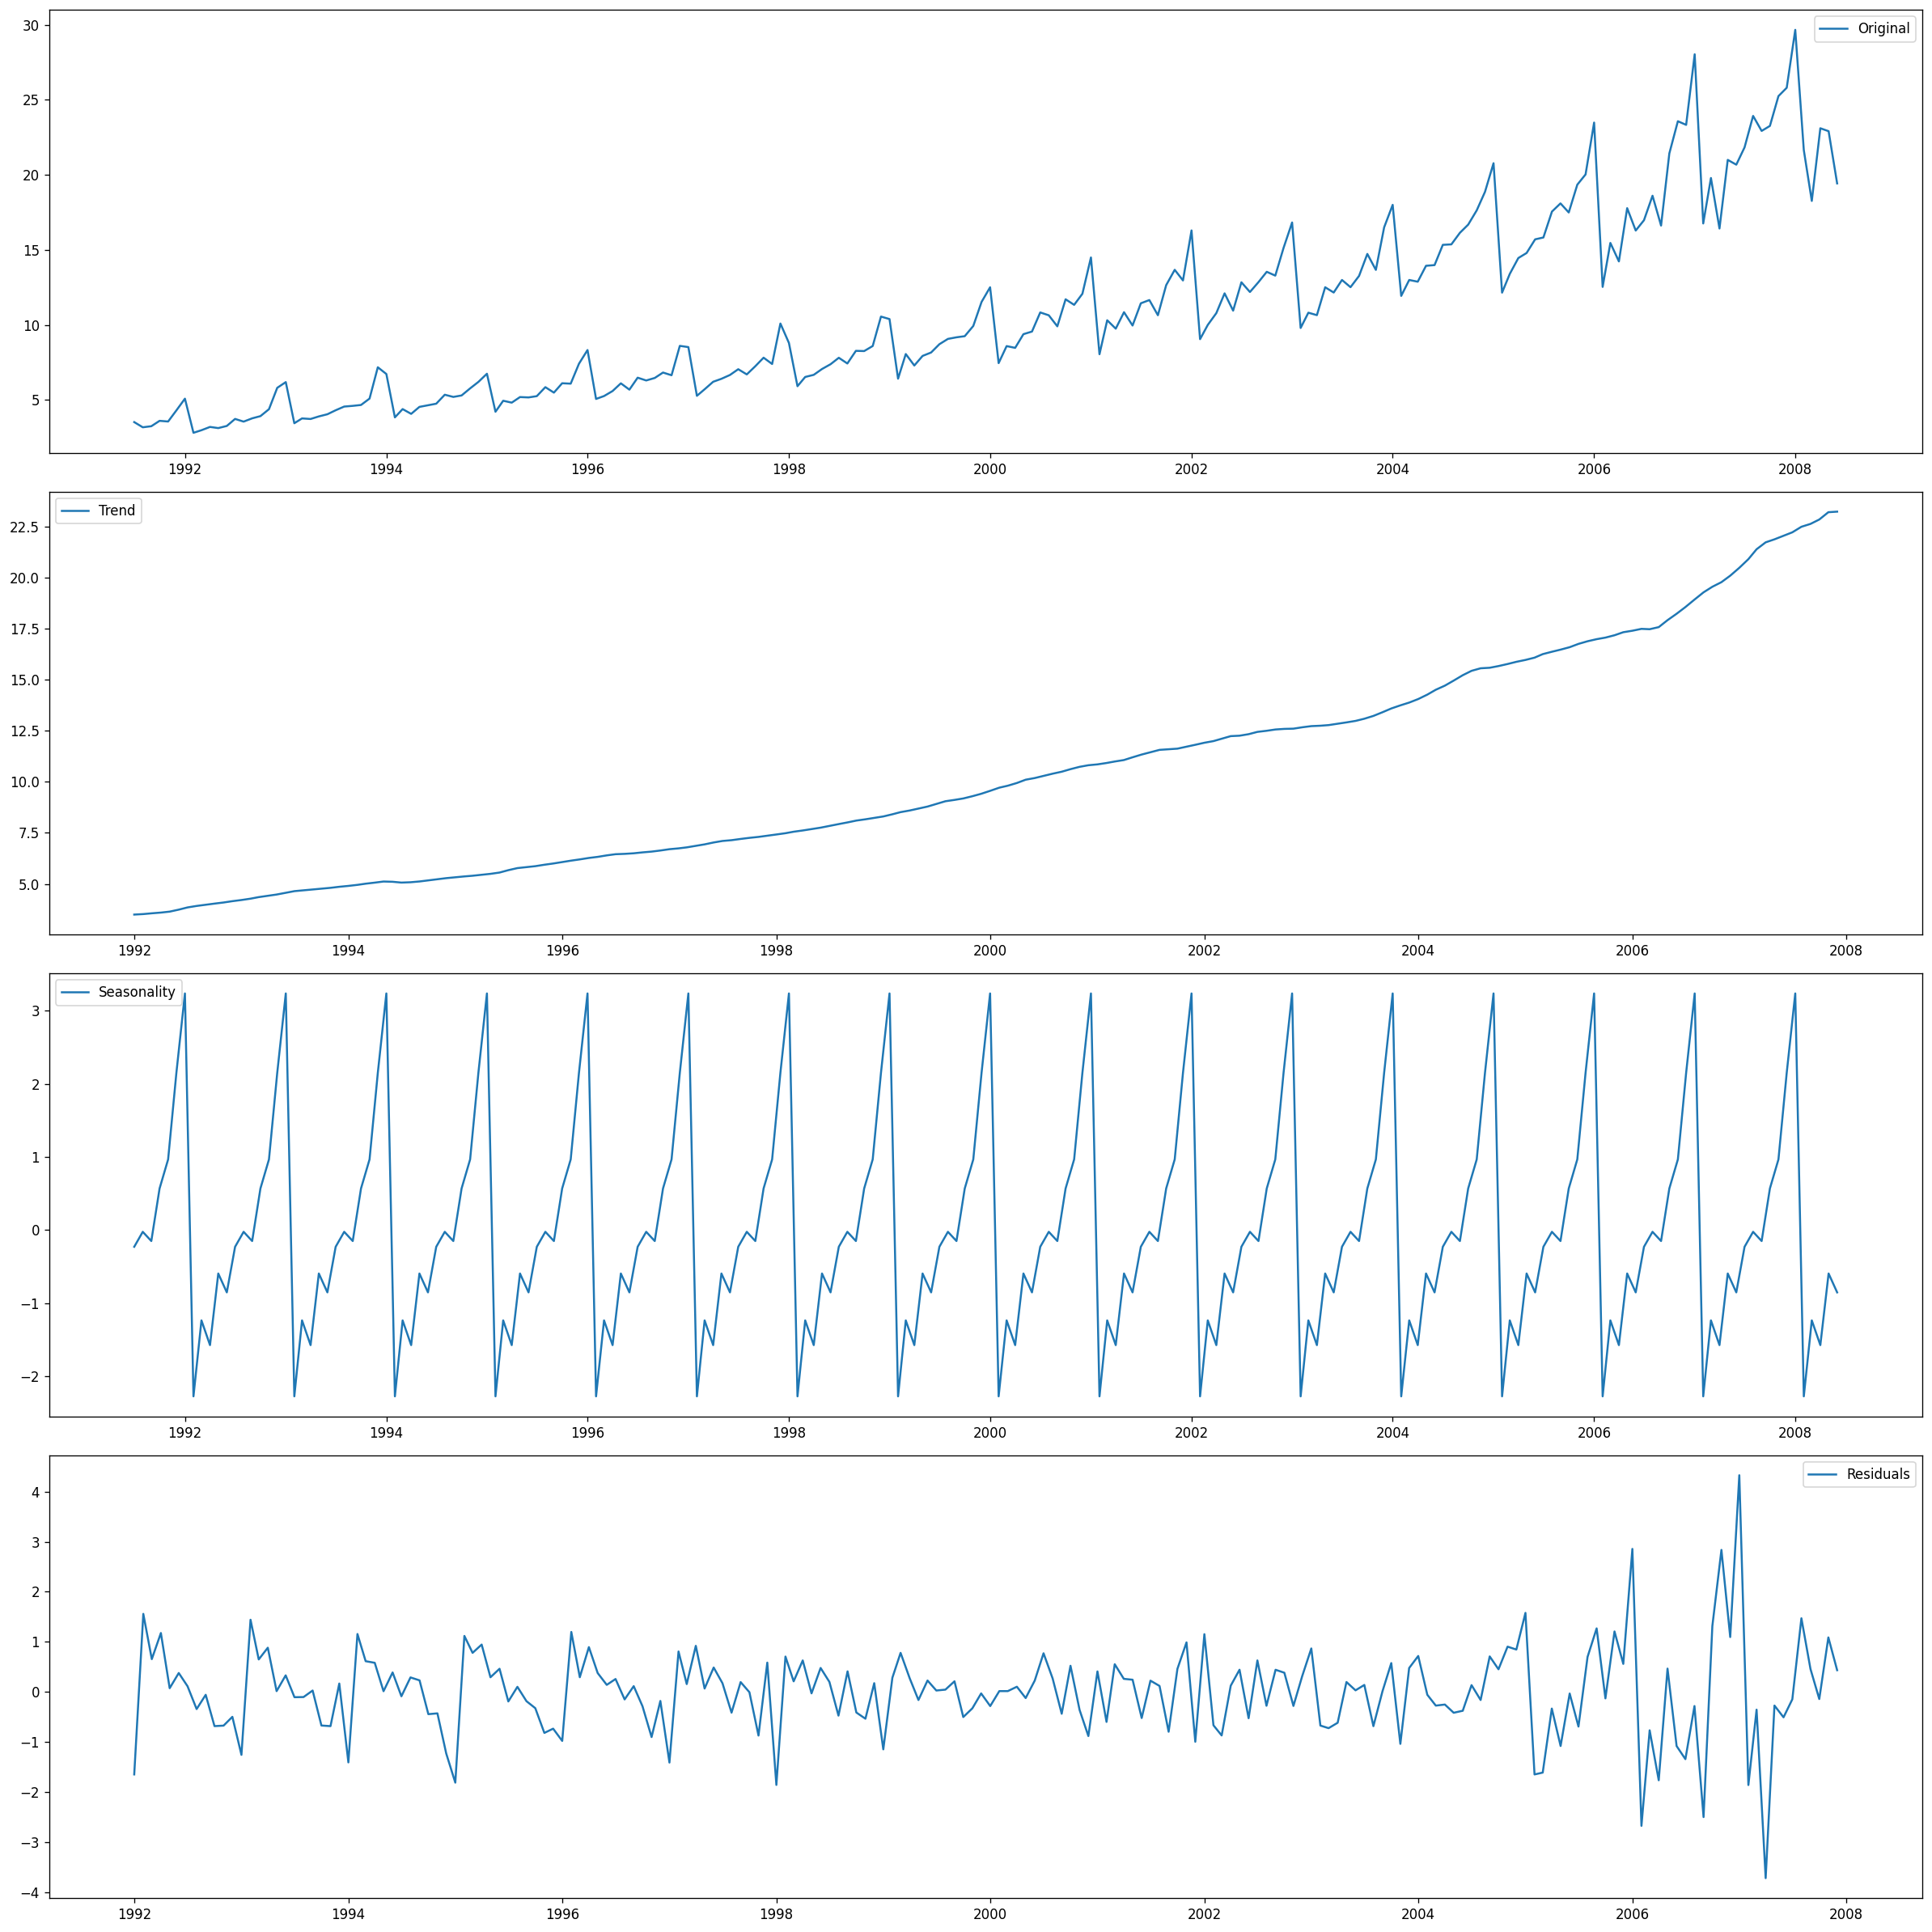

In [597]:
from statsmodels.tsa.seasonal import seasonal_decompose

dfSimple = df[["value"]]
decomposition = seasonal_decompose(dfSimple)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,20))

plt.subplot(411)
plt.plot(dfSimple, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

***

### Split train + test

In [598]:
# Vamos a hacer un split entre train y test, teniendo en cuenta que, al tratarse de una 
# serie de tiempo, tenemos que poner shuffle=False

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.1, random_state=42, shuffle=False)

In [599]:
df_train.tail()

,value,MA_3,MA_15,year,month
date,,,,,
2006-05-01,17.783058,15.827872,16.681974,2006,May
2006-06-01,16.291602,16.102733,16.874588,2006,Jun
2006-07-01,16.980282,17.018314,17.042658,2006,Jul
2006-08-01,18.612189,17.294691,17.297130,2006,Aug
2006-09-01,16.623343,17.405271,17.358337,2006,Sep


In [600]:
df_test.head()

,value,MA_3,MA_15,year,month
date,,,,,
2006-10-01,21.430241,18.888591,17.731716,2006,Oct
2006-11-01,23.575517,20.543034,18.133104,2006,Nov
2006-12-01,23.334206,22.779988,18.481993,2006,Dec
2007-01-01,28.038383,24.982702,19.184774,2007,Jan
2007-02-01,16.763869,22.712153,19.012548,2007,Feb


In [601]:
df_train.shape

(183, 5)

In [602]:
df_test.shape

(21, 5)

## 2) Modelos básicos para prónosticos
* Modelo de la media constante
* Modelo de tendencia lineal
* Modelo de tendencia cuadrática
* Modelo Random Walk (Naive)



## 2.a) Media constante

In [603]:
# Calculamos el promedio, uniforme para todos
model_mean_pred = df_train['value'].mean()

# La predicción es fija y es la misma para el set de testeo y de entrenamiento:
df_train["Mean"] = model_mean_pred
df_test["Mean"] = model_mean_pred

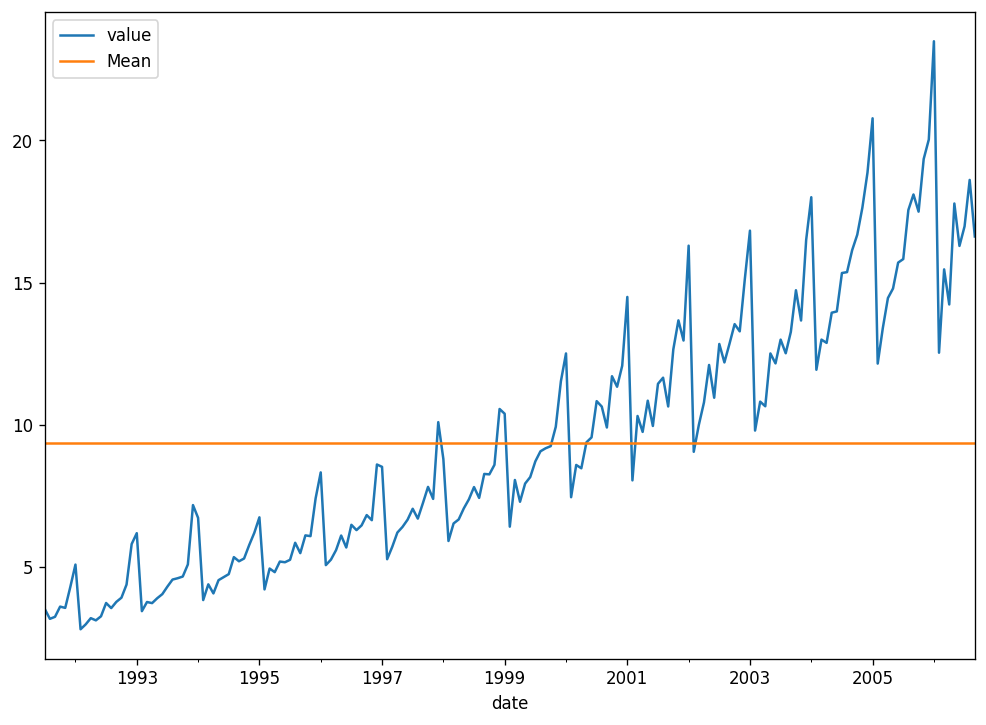

In [604]:
# Ploteamos los valores del set de entrenamiento y el modelo:
df_train.plot(kind="line", y = ["value", "Mean"]);

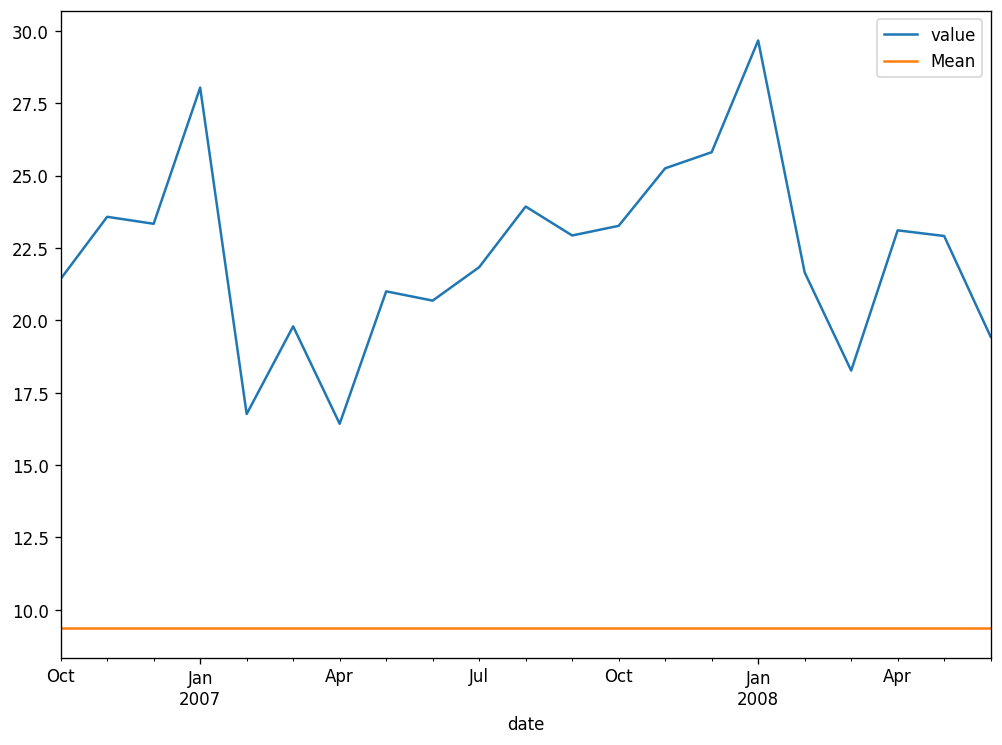

In [605]:
# Ploteamos los valores del set de testeo y el modelo
df_test.plot(kind="line", y = ["value", "Mean"]);

* ¿Cuán bien ajusta esta estimación?

Calculemos el RMSE...

In [606]:
def RMSE(predicted, actual):
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

In [607]:
model_mean_RMSE = RMSE(df_test.Mean, df_test.value)
model_mean_RMSE

13.372575727796352

In [608]:
# Guardamos todo en un dataframe
df_Results = pd.DataFrame(columns = ["Model", "RMSE"])
df_Results.loc[0, "Model"] = "Mean"
df_Results.loc[0, "RMSE"] = model_mean_RMSE
df_Results.head()

,Model,RMSE
0,Mean,13.372576


## 2.b) Random Walk

Decimos que un proceso $ {Y_t} $ es **random walk** (sigue una trayectoria al azar si):

$$ \ {Y_t} = Y_ {t-1} + \epsilon,  $$

siendo &epsilon; (epsilon) **ruido blanco**. Si al modelo anterior le añadimos un desplazamiento *d*, obtenemos un **random walk con deriva (with drift)**:

$$ \ {Y_t} = Y_ {t-1} + d + \epsilon $$

Cuando nos enfrentamos a una serie de tiempo que muestra una evolución irregular, la mejor estrategia no es tratar de predecir directamente el nivel de la serie en cada período (es decir, el valor Yt), sino el cambio que ocurre de un período al siguiente (es decir, la diferencia Yt - Yt-1). **Se observa la primera diferencia (o lag) de la serie para encontrar un patrón predecible**.

A los efectos del pronóstico del próximo período, puede ser tan bueno predecir el nivel como la variación, ya que el cambio predicho puede agregarse al nivel actual para generar un nivel pronosticado. El caso más simple de dicho modelo es uno que siempre predice que el siguiente cambio será cero, como si la serie tuviera la misma probabilidad de subir o bajar en el próximo período, independientemente de lo que haya sucedido en el pasado.

In [609]:
# Generamos el desplazamiento de nuestro nuestro target en el set de entrenamiento (lag=1)
df_train["valueShift1"] = df_train.value.shift()
df_train.head()

,value,MA_3,MA_15,year,month,Mean,valueShift1
date,,,,,,,
1991-07-01,3.526591,NaN,NaN,1991,Jul,9.358296,NaN
1991-08-01,3.180891,NaN,NaN,1991,Aug,9.358296,3.526591
1991-09-01,3.252221,3.319901,NaN,1991,Sep,9.358296,3.180891
1991-10-01,3.611003,3.348038,NaN,1991,Oct,9.358296,3.252221
1991-11-01,3.565869,3.476364,NaN,1991,Nov,9.358296,3.611003


In [610]:
# Generamos el desplazamiento de nuestro nuestro target en el set de testeo (lag=1)
df_test["valueShift1"] = df_test.value.shift()
df_test.head()

,value,MA_3,MA_15,year,month,Mean,valueShift1
date,,,,,,,
2006-10-01,21.430241,18.888591,17.731716,2006,Oct,9.358296,NaN
2006-11-01,23.575517,20.543034,18.133104,2006,Nov,9.358296,21.430241
2006-12-01,23.334206,22.779988,18.481993,2006,Dec,9.358296,23.575517
2007-01-01,28.038383,24.982702,19.184774,2007,Jan,9.358296,23.334206
2007-02-01,16.763869,22.712153,19.012548,2007,Feb,9.358296,28.038383


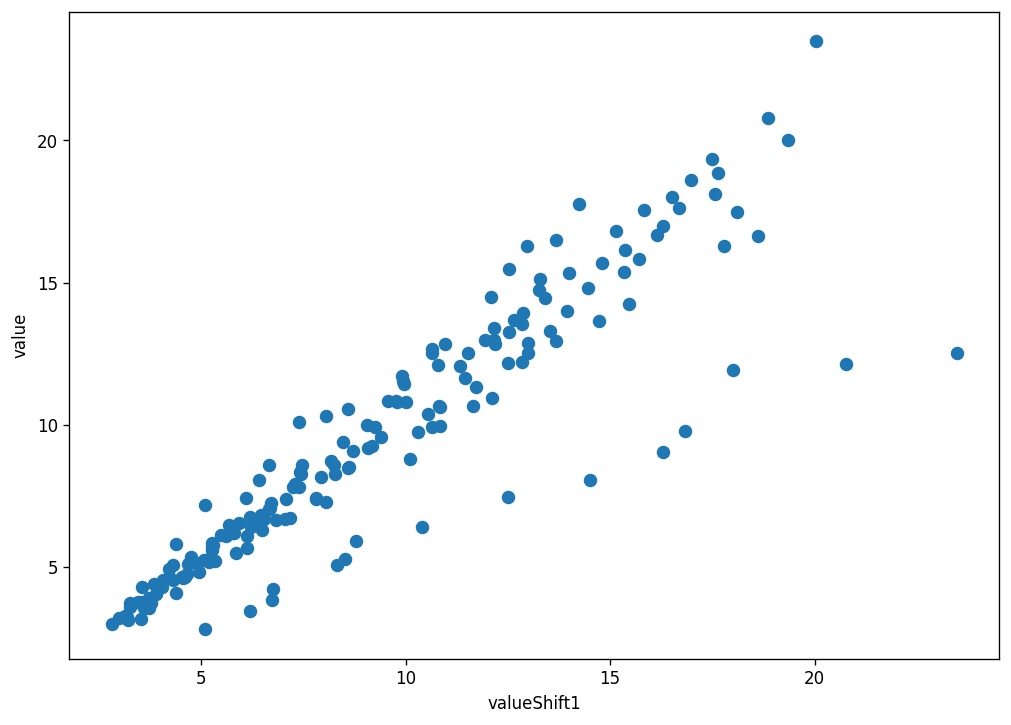

In [611]:
df_train.plot(kind= "scatter", y = "value", x = "valueShift1", s = 50);

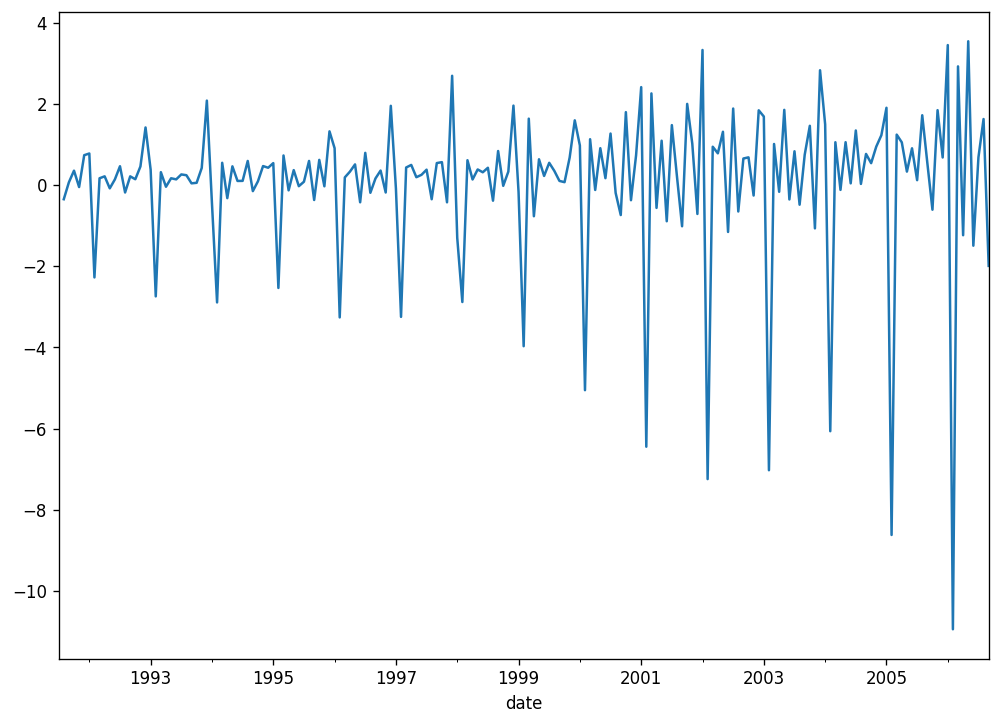

In [612]:
# Ploteamos la diferencia entre nuestro target y el lag de un período
df_train["valueDiff"] = df_train.value - df_train.valueShift1
df_train.valueDiff.plot();

                value       MA_3      MA_15  year month      Mean  \
date                                                                
1991-07-01   3.526591        NaN        NaN  1991   Jul  9.358296   
1991-08-01   3.180891        NaN        NaN  1991   Aug  9.358296   
1991-09-01   3.252221   3.319901        NaN  1991   Sep  9.358296   
1991-10-01   3.611003   3.348038        NaN  1991   Oct  9.358296   
1991-11-01   3.565869   3.476364        NaN  1991   Nov  9.358296   
...               ...        ...        ...   ...   ...       ...   
2006-05-01  17.783058  15.827872  16.681974  2006   May  9.358296   
2006-06-01  16.291602  16.102733  16.874588  2006   Jun  9.358296   
2006-07-01  16.980282  17.018314  17.042658  2006   Jul  9.358296   
2006-08-01  18.612189  17.294691  17.297130  2006   Aug  9.358296   
2006-09-01  16.623343  17.405271  17.358337  2006   Sep  9.358296   

            valueShift1  valueDiff  RandomWalk  
date                                            
1991

<AxesSubplot:xlabel='date'>

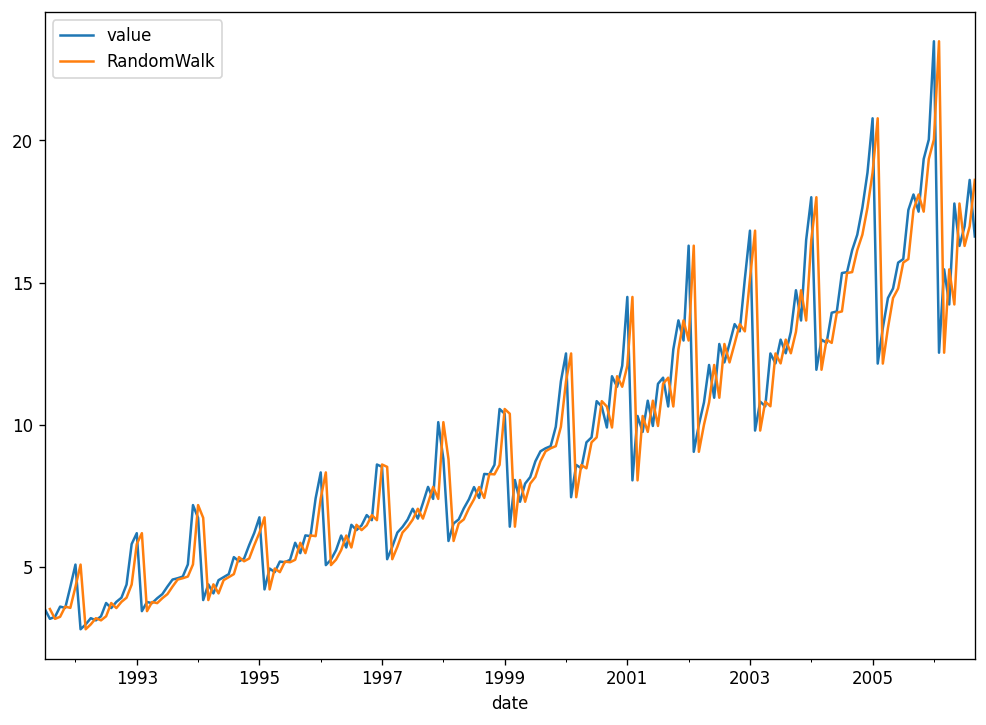

In [613]:
df_train["RandomWalk"] = df_train.valueShift1
print(df_train)

df_train.plot(kind="line", y = ["value", "RandomWalk"])

In [614]:
# La predicción sobre el set de testeo es simplemente la última observación
# registrada en el set de entrenamiento.
# A partir de ahí, como la esperanza del shock es 0, y_t = y_t-1

df_test["RandomWalk"] = pd.Series(df_train["value"][-1], index=df_test.index)
print(df_test["RandomWalk"])

date
2006-10-01    16.623343
2006-11-01    16.623343
2006-12-01    16.623343
2007-01-01    16.623343
2007-02-01    16.623343
2007-03-01    16.623343
2007-04-01    16.623343
2007-05-01    16.623343
2007-06-01    16.623343
2007-07-01    16.623343
2007-08-01    16.623343
2007-09-01    16.623343
2007-10-01    16.623343
2007-11-01    16.623343
2007-12-01    16.623343
2008-01-01    16.623343
2008-02-01    16.623343
2008-03-01    16.623343
2008-04-01    16.623343
2008-05-01    16.623343
2008-06-01    16.623343
Name: RandomWalk, dtype: float64


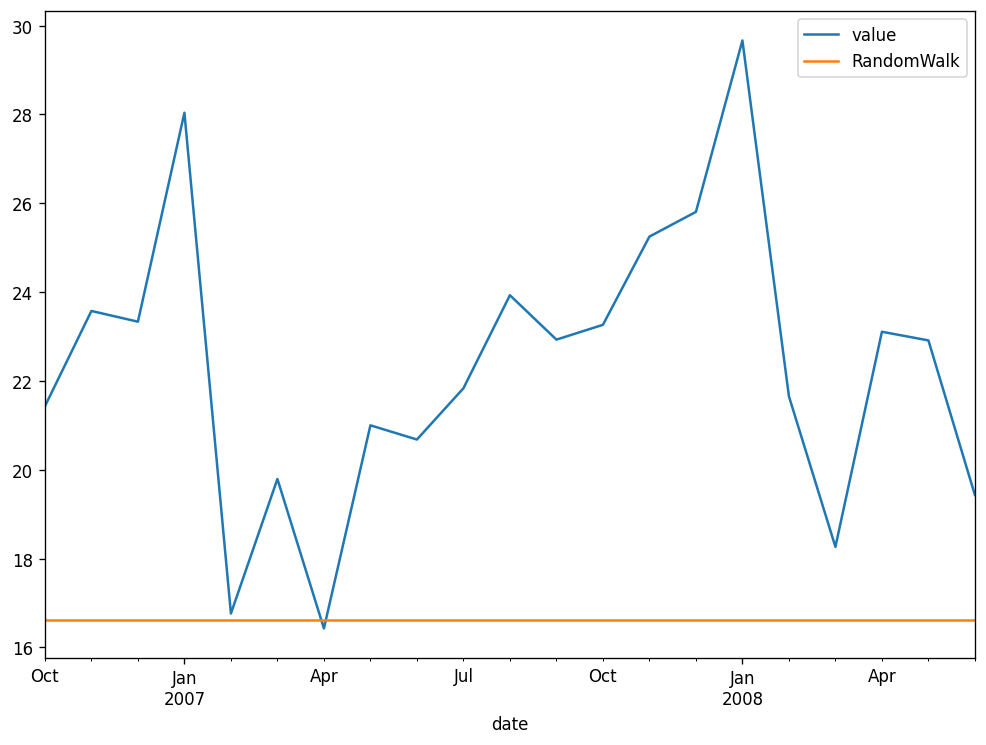

In [615]:
df_test.plot(kind="line", y = ["value", "RandomWalk"]);

In [616]:
# Calculamos el RMSE y almacenamos los resultados
df_Results.loc[1, "Model"] = "Random Walk"
df_Results.loc[1, "RMSE"] = RMSE(df_test.RandomWalk, df_test.value)
df_Results

,Model,RMSE
0,Mean,13.372576
1,Random Walk,6.558364


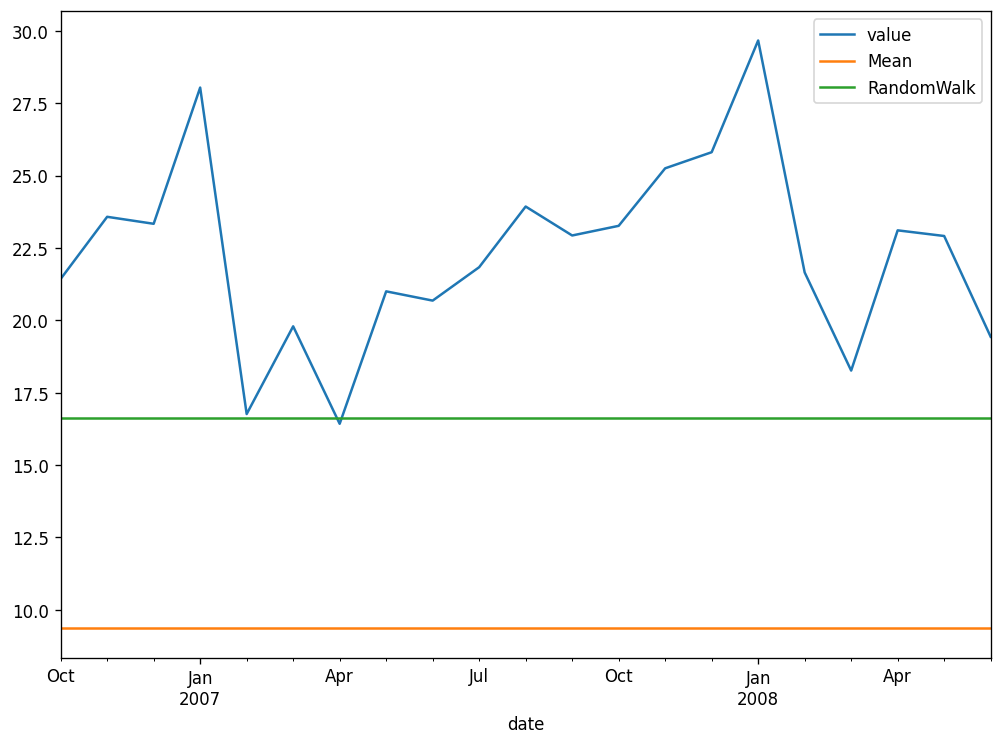

In [617]:
df_test.plot(kind = "line", y = ["value", "Mean", "RandomWalk"]);

#### Los métodos de predicción de series de tiempo randomWalk y Naive, ¿son lo mismo?

Los métodos de predicción de series de tiempo "random walk" y "naive" son similares en el sentido de que ambos asumen que el valor futuro de una serie temporal será igual al valor actual. Sin embargo, hay algunas diferencias entre ellos:

El método de "random walk" se refiere a un proceso estocástico en el que el valor actual de una variable se considera como la suma de un valor inicial y un proceso de ruido. En el caso de una serie temporal, el valor futuro se considera como la suma del valor actual y una cantidad aleatoria.

El método "naive" o "persistence", es muy simple, consiste en asumir que el valor futuro será igual al valor actual. Es un método muy utilizado como benchmark, es decir como punto de referencia para comparar los resultados de otros métodos mas complejos.

En resumen, ambos métodos asumen que el valor futuro será igual al valor actual, pero random walk agrega un elemento estocástico mientras que el Naive solo considera el valor actual.

## 2.c) Tendencia lineal

Continuaremos trabajando con la tendencia lineal entre value y time. Primero tenemos que crear una **dummie de tiempo**, es decir indicador numérico para el período de tiempo para hacer una regresión lineal.

In [618]:
# Identificamos el punto de inicio de la data
df_train.index.min()

Timestamp('1991-07-01 00:00:00')

In [619]:
# Convertimos nuestra data almacenada en 'date' en datetime-delta, comenzando por cero
df_train["timeIndex"] = df_train.index - df_train.index.min()
df_test["timeIndex"] = df_test.index - df_train.index.min()

In [620]:
# Transformamos la última columna de días a meses con timedelta
df_train["timeIndex"] =  df_train["timeIndex"] / np.timedelta64(1, 'M')
df_test["timeIndex"] =  df_test["timeIndex"] / np.timedelta64(1, 'M')

In [621]:
# Redondeamos, quitando todos los decimales
df_train["timeIndex"] = df_train["timeIndex"].round(0).astype(int)
df_test["timeIndex"] = df_test["timeIndex"].round(0).astype(int)

In [622]:
df_train.tail()

,value,MA_3,MA_15,year,month,Mean,valueShift1,valueDiff,RandomWalk,timeIndex
date,,,,,,,,,,
2006-05-01,17.783058,15.827872,16.681974,2006,May,9.358296,14.233539,3.549519,14.233539,178
2006-06-01,16.291602,16.102733,16.874588,2006,Jun,9.358296,17.783058,-1.491456,17.783058,179
2006-07-01,16.980282,17.018314,17.042658,2006,Jul,9.358296,16.291602,0.688680,16.291602,180
2006-08-01,18.612189,17.294691,17.297130,2006,Aug,9.358296,16.980282,1.631907,16.980282,181
2006-09-01,16.623343,17.405271,17.358337,2006,Sep,9.358296,18.612189,-1.988846,18.612189,182


In [623]:
df_test.head()

,value,MA_3,MA_15,year,month,Mean,valueShift1,RandomWalk,timeIndex
date,,,,,,,,,
2006-10-01,21.430241,18.888591,17.731716,2006,Oct,9.358296,NaN,16.623343,183
2006-11-01,23.575517,20.543034,18.133104,2006,Nov,9.358296,21.430241,16.623343,184
2006-12-01,23.334206,22.779988,18.481993,2006,Dec,9.358296,23.575517,16.623343,185
2007-01-01,28.038383,24.982702,19.184774,2007,Jan,9.358296,23.334206,16.623343,186
2007-02-01,16.763869,22.712153,19.012548,2007,Feb,9.358296,28.038383,16.623343,187


**ols** es "Ordinary Least Squares". Es un método estadístico utilizado para ajustar una línea recta a un conjunto de puntos de datos. El objetivo es encontrar los coeficientes de la ecuación de la línea recta que minimizan la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos.

Resumiendo, otra forma de calcular una regresión lineal.

Hemos usado:

```import statsmodels.formula.api as smf```

"statsmodels.formula.api" es una función de la biblioteca de Python "statsmodels" que proporciona una interfaz similar a R para modelos estadísticos. Permite a los usuarios especificar modelos estadísticos utilizando una sintaxis similar a la de las fórmulas utilizadas en R y en el paquete stats de R. Utiliza una sintaxis de fórmulas para especificar las relaciones entre las variables y los parámetros del modelo, lo que facilita la especificación de modelos complejos. Con esta función se pueden especificar modelos lineales, modelos de regresión, modelos de clasificación, entre otros.

In [624]:
# Ahora fiteamos nuestro modelo de regresión lineal entre Value y timeIndex
model_linear = smf.ols('value ~ timeIndex', data = df_train).fit()

El primer argumento corresponde a la forma funcional de nuestra estimación. [Más detalles](http://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html).

In [625]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1156.
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.62e-80
Time:                        18:41:10   Log-Likelihood:                -354.54
No. Observations:                 183   AIC:                             713.1
Df Residuals:                     181   BIC:                             719.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0473      0.249      8.234      0.000       1.557       2.538
timeIndex      0.0803      0.002     33.999      0.000       0.076       0.085
==============================================================================
Omnibus:                       32.443   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.423
Skew:                           0.897   Prob(JB):                     5.60e-13
Kurtosis:                       5.046   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [626]:
# Veamos las predicciones del modelo sobre el set de entrenamiento:

model_linear_pred_train = model_linear.predict(df_train.timeIndex)
model_linear_pred_train[-5:]

date
2006-05-01    16.347945
2006-06-01    16.428286
2006-07-01    16.508626
2006-08-01    16.588967
2006-09-01    16.669308
dtype: float64

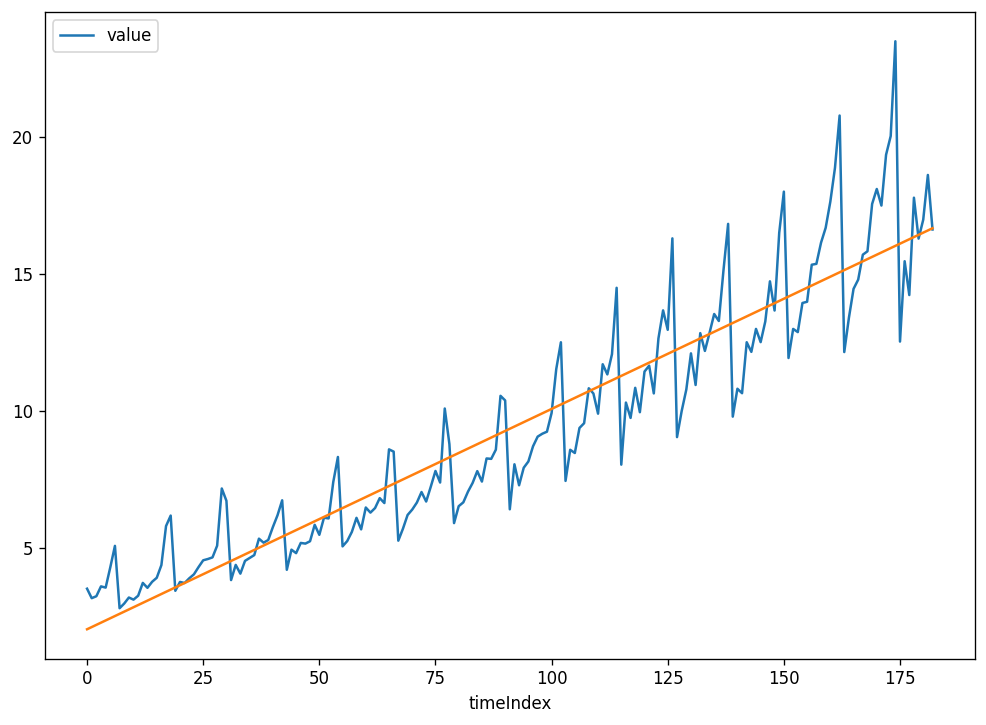

In [627]:
# Ploteamos los resultados de la predicción
df_train.plot(kind = "line", x = "timeIndex", y = "value")
plt.plot(df_train.timeIndex, model_linear_pred_train, '-');

In [628]:
# Veamos las predicciones del modelo sobre el set de testeo:

model_linear_pred_test = model_linear.predict(df_test.timeIndex)
model_linear_pred_test[-5:]

date
2008-02-01    18.035101
2008-03-01    18.115442
2008-04-01    18.195783
2008-05-01    18.276124
2008-06-01    18.356465
dtype: float64

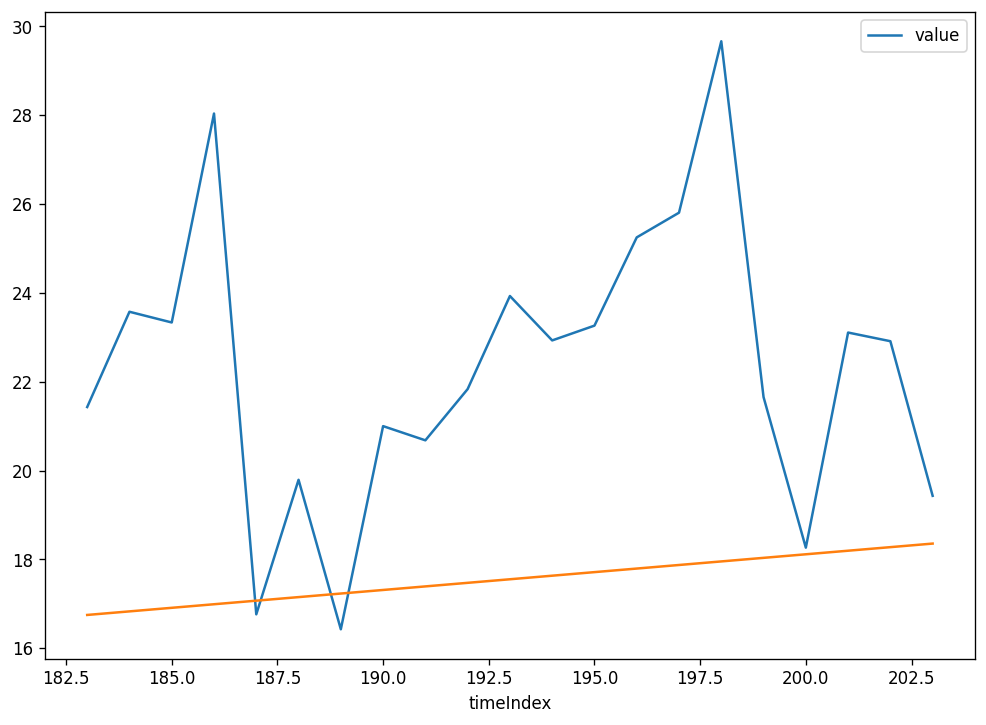

In [629]:
# Ploteamos los resultados de la predicción

df_test.plot(kind = "line", x = "timeIndex", y = "value")
plt.plot(df_test.timeIndex, model_linear_pred_test, '-');

In [630]:
# Agregamos las predicciones a df_test:

df_test["LinearTrend"] = model_linear_pred_test
df_test.head()

,value,MA_3,MA_15,year,month,Mean,valueShift1,RandomWalk,timeIndex,LinearTrend
date,,,,,,,,,,
2006-10-01,21.430241,18.888591,17.731716,2006,Oct,9.358296,NaN,16.623343,183,16.749649
2006-11-01,23.575517,20.543034,18.133104,2006,Nov,9.358296,21.430241,16.623343,184,16.829990
2006-12-01,23.334206,22.779988,18.481993,2006,Dec,9.358296,23.575517,16.623343,185,16.910330
2007-01-01,28.038383,24.982702,19.184774,2007,Jan,9.358296,23.334206,16.623343,186,16.990671
2007-02-01,16.763869,22.712153,19.012548,2007,Feb,9.358296,28.038383,16.623343,187,17.071012


In [631]:
# Calculamos el error:

model_linear_RMSE = RMSE(df_test.LinearTrend, df_test.value)
model_linear_RMSE

5.760956939400331

In [632]:
# Añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior

df_Results.loc[2, "Model"] = "LinearTrend"
df_Results.loc[2, "RMSE"] = model_linear_RMSE
df_Results

,Model,RMSE
0,Mean,13.372576
1,Random Walk,6.558364
2,LinearTrend,5.760957


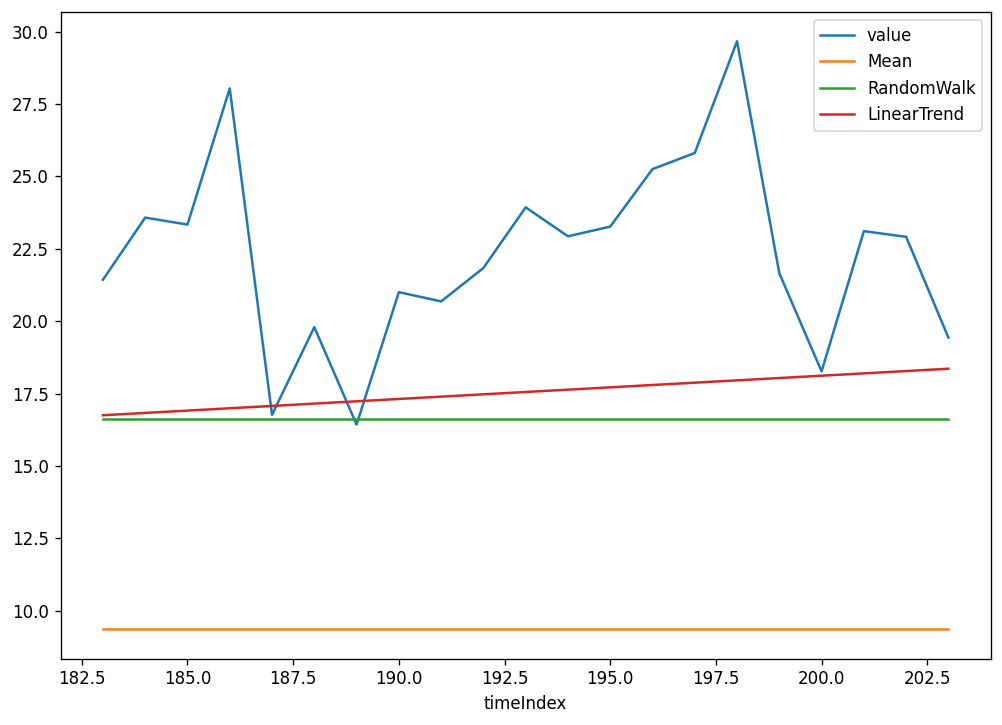

In [633]:
# Ploteamos las estimaciones
df_test.plot(kind = "line", x = "timeIndex", y = ["value", "Mean", "RandomWalk",
                                                 "LinearTrend"]);

## 2.d) Tendencia cuadrática

Continuaremos trabajando con la tendencia cuadrática entre *value* y *time*.

In [634]:
# Creamos las dummies de tiempo cuadráticas:

df_train["timeIndex_sq"] = df_train["timeIndex"]**2
df_test["timeIndex_sq"] = df_test["timeIndex"]**2

In [635]:
# Ahora fiteamos nuestro modelo de regresión lineal entre value y timeIndex + timeIndex_sq

model_quadratic = smf.ols('value ~ timeIndex + timeIndex_sq', data = df_train).fit()

In [636]:
model_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     693.9
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           2.50e-85
Time:                        18:41:11   Log-Likelihood:                -339.46
No. Observations:                 183   AIC:                             684.9
Df Residuals:                     180   BIC:                             694.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.4874      0.342     10.195      0.000       2.812       4.162
timeIndex        0.0326      0.009      3.754      0.000       0.015       0.050
timeIndex_sq     0.0003   4.62e-05      5.679      0.000       0.000       0.000
==============================================================================
Omnibus:                       28.626   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.032
Skew:                           0.762   Prob(JB):                     1.85e-12
Kurtosis:                       5.182   Cond. No.                     4.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [637]:
# Veamos las predicciones del modelo sobre el set de entrenamiento:

model_quadratic_pred_train = model_quadratic.predict(df_train[["timeIndex",\
                                                      "timeIndex_sq"]])
model_quadratic_pred_train[-5:]

date
2006-05-01    17.601260
2006-06-01    17.727501
2006-07-01    17.854268
2006-08-01    17.981559
2006-09-01    18.109374
dtype: float64

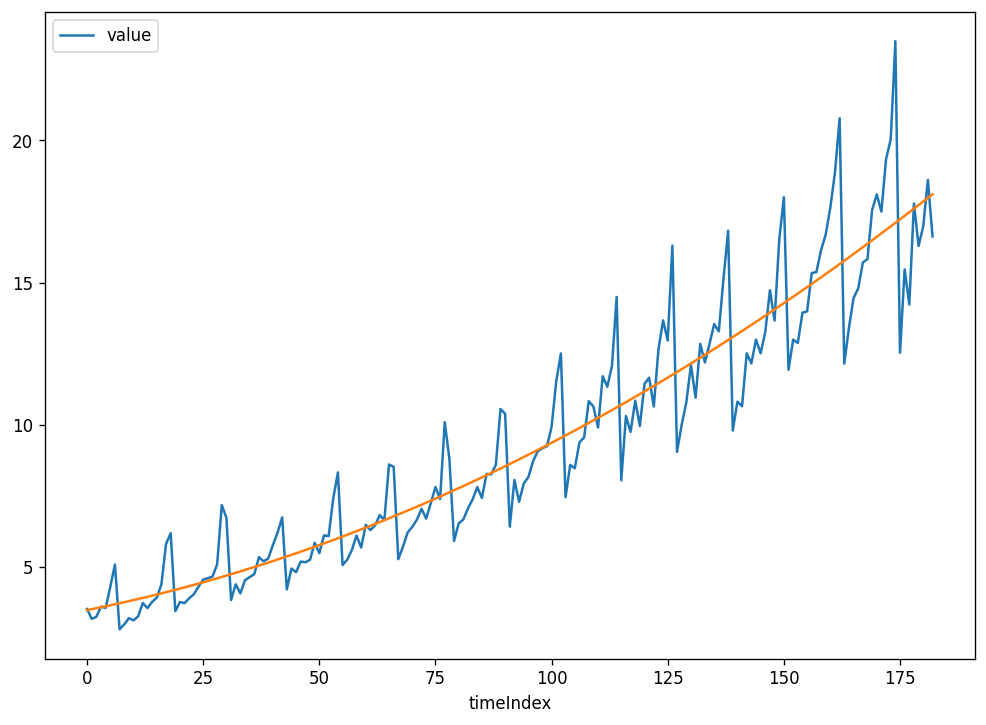

In [638]:
# Ploteamos los resultados de la predicción:

df_train.plot(kind = "line", x = "timeIndex", y = "value")
plt.plot(df_train.timeIndex, model_quadratic_pred_train, '-');

In [639]:
# Veamos las predicciones del modelo sobre el set de testeo:

model_quadratic_pred_test = model_quadratic.predict(df_test[["timeIndex",\
                                                      "timeIndex_sq"]])
model_quadratic_pred_test[-5:]

date
2008-02-01    20.362499
2008-03-01    20.499757
2008-04-01    20.637539
2008-05-01    20.775846
2008-06-01    20.914678
dtype: float64

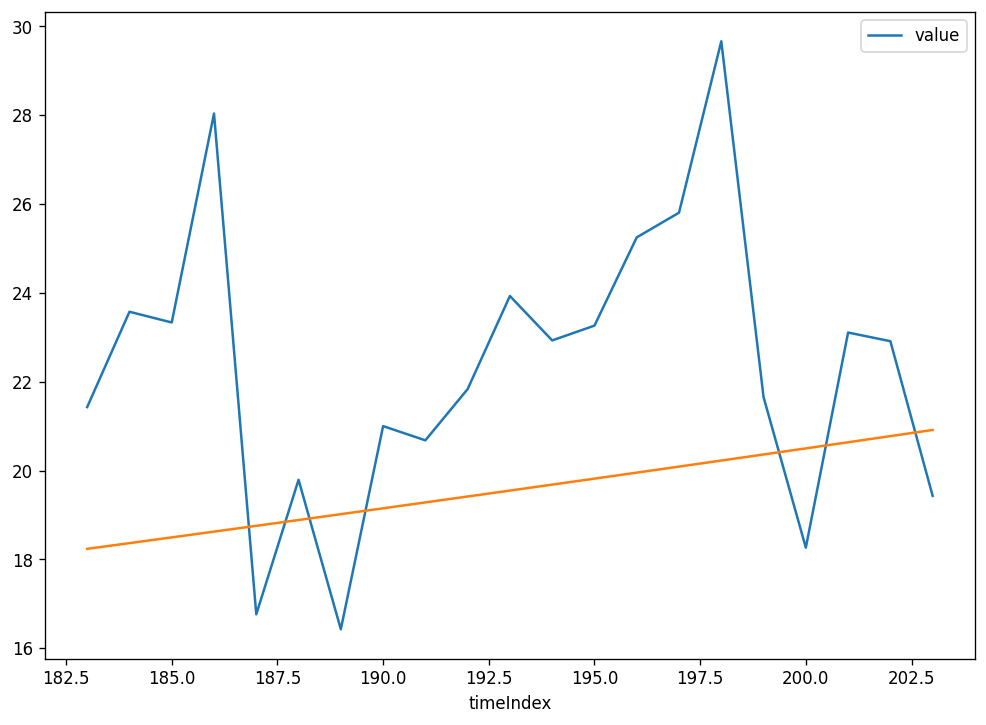

In [640]:
# Ploteamos los resultados de la predicción

df_test.plot(kind = "line", x = "timeIndex", y = "value")
plt.plot(df_test.timeIndex, model_quadratic_pred_test, '-');

In [641]:
df_test["QuadraticTrend"] = model_quadratic_pred_test
df_test.head()

,value,MA_3,MA_15,year,month,Mean,valueShift1,RandomWalk,timeIndex,LinearTrend,timeIndex_sq,QuadraticTrend
date,,,,,,,,,,,,
2006-10-01,21.430241,18.888591,17.731716,2006,Oct,9.358296,NaN,16.623343,183,16.749649,33489,18.237714
2006-11-01,23.575517,20.543034,18.133104,2006,Nov,9.358296,21.430241,16.623343,184,16.829990,33856,18.366579
2006-12-01,23.334206,22.779988,18.481993,2006,Dec,9.358296,23.575517,16.623343,185,16.910330,34225,18.495968
2007-01-01,28.038383,24.982702,19.184774,2007,Jan,9.358296,23.334206,16.623343,186,16.990671,34596,18.625882
2007-02-01,16.763869,22.712153,19.012548,2007,Feb,9.358296,28.038383,16.623343,187,17.071012,34969,18.756320


In [642]:
# Calculamos el error:

model_quadratic_RMSE = RMSE(df_test.QuadraticTrend, df_test.value)
model_quadratic_RMSE

4.270679391841772

In [643]:
# Añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior
df_Results.loc[3, "Model"] = "QuadraticTrend"
df_Results.loc[3, "RMSE"] = model_quadratic_RMSE
df_Results

,Model,RMSE
0,Mean,13.372576
1,Random Walk,6.558364
2,LinearTrend,5.760957
3,QuadraticTrend,4.270679


## 2.e) Tendencia cuadrática + dummies mensuales

#### Creamos variables dummie para los meses:

Las variables dummie en los meses se utilizan para controlar el efecto del componente estacional en una serie de tiempo. Los datos de una serie de tiempo a menudo muestran patrones regulares que se repiten cada año, como aumentos en las ventas durante las fiestas navideñas o picos en el turismo durante el verano. Al crear variables dummie para cada mes e incluirlas en un modelo estadístico, se puede controlar el efecto de estos patrones estacionales en la variable dependiente y analizar mejor las tendencias y relaciones subyacentes.

La variable mes en formato numérico lleva un peso implícito que puede confundir al algoritmo de fit que apliquemos, puesto que Enero se representa con 1 y Diciembre con 12, como si Diciembre valiera 12 Eneros. La forma de eliminar ese peso ficticio es creando variables booleanas para cada mes, todas con un peso equivalente de cara al algoritmo.

In [644]:
# Veamos el shape de nuestro df:
df.shape

(204, 5)

In [645]:
# Creamos variables dummie para los meses:
dummie_mes = pd.get_dummies(df['month'], drop_first=True)
dummie_mes.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,
1991-07-01,0,0,0,0,1,0,0,0,0,0,0
1991-08-01,1,0,0,0,0,0,0,0,0,0,0
1991-09-01,0,0,0,0,0,0,0,0,0,0,1
1991-10-01,0,0,0,0,0,0,0,0,0,1,0
1991-11-01,0,0,0,0,0,0,0,0,1,0,0


In [646]:
df = df.join(dummie_mes)
df.sample(10)

,value,MA_3,MA_15,year,month,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,,,,,,
2008-06-01,19.431740,21.817309,22.410698,2008,Jun,0,0,0,0,0,1,0,0,0,0,0
2000-02-01,7.457199,10.500545,9.099110,2000,Feb,0,0,1,0,0,0,0,0,0,0,0
2004-05-01,13.943447,13.274664,13.306766,2004,May,0,0,0,0,0,0,0,1,0,0,0
1996-02-01,5.069796,6.938615,5.795363,1996,Feb,0,0,1,0,0,0,0,0,0,0,0
1994-12-01,6.204593,5.759996,5.183849,1994,Dec,0,1,0,0,0,0,0,0,0,0,0
1993-03-01,3.772307,4.471744,3.940145,1993,Mar,0,0,0,0,0,0,1,0,0,0,0
1999-10-01,9.251887,9.166655,8.507698,1999,Oct,0,0,0,0,0,0,0,0,0,1,0
1995-06-01,5.170787,5.062862,5.130183,1995,Jun,0,0,0,0,0,1,0,0,0,0,0
2002-05-01,12.106705,10.965968,11.478150,2002,May,0,0,0,0,0,0,0,1,0,0,0


In [647]:
df_train = df_train.join(dummie_mes)

In [648]:
# Ahora fiteamos nuestro modelo de regresión lineal entre value y timeIndex + timeIndex_sq
# más las dummies de mes

model_trend_est = smf.ols('value ~ timeIndex + timeIndex_sq + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep',\
                          data = df_train).fit()

In [649]:
model_trend_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     442.4
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          4.51e-123
Time:                        18:41:13   Log-Likelihood:                -212.12
No. Observations:                 183   AIC:                             452.2
Df Residuals:                     169   BIC:                             497.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1383      0.268      7.992      0.000       1.610       2.666
timeIndex        0.0330      0.004      7.367      0.000       0.024       0.042
timeIndex_sq     0.0003   2.38e-05     11.054      0.000       0.000       0.000
Aug              1.2844      0.289      4.451      0.000       0.715       1.854
Dec              3.2856      0.293     11.211      0.000       2.707       3.864
Feb             -0.8284      0.293     -2.827      0.005      -1.407      -0.250
Jan              4.2664      0.293     14.559      0.000       3.688       4.845
Jul              1.1998      0.289      4.158      0.000       0.630       1.769
Jun              0.5549      0.293      1.894      0.060      -0.024       1.133
Mar              0.1082      0.293      0.369      0.712      -0.470       0.687
May              0.7712      0.293      2.632      0.009       0.193       1.350
Nov              1.9747      0.293      6.738      0.000       1.396       2.553
Oct              1.7978      0.293      6.134      0.000       1.219       2.376
Sep              1.2331      0.289      4.273      0.000       0.663       1.803
==============================================================================
Omnibus:                       13.961   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               33.339
Skew:                           0.236   Prob(JB):                     5.76e-08
Kurtosis:                       5.037   Cond. No.                     1.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [650]:
# Veamos las predicciones del modelo sobre el set de entrenamiento:

model_trend_est_pred_train = model_trend_est.predict(df_train[["timeIndex", "timeIndex_sq",\
                                                               "Aug", "Dec", "Feb", "Jan",\
                                                                "Jul", "Jun",\
                                                                "Mar", "May", "Nov",\
                                                                "Oct", "Sep"]])
model_trend_est_pred_train[-5:]

date
2006-05-01    17.123477
2006-06-01    17.034134
2006-07-01    17.806586
2006-08-01    18.019169
2006-09-01    18.096451
dtype: float64

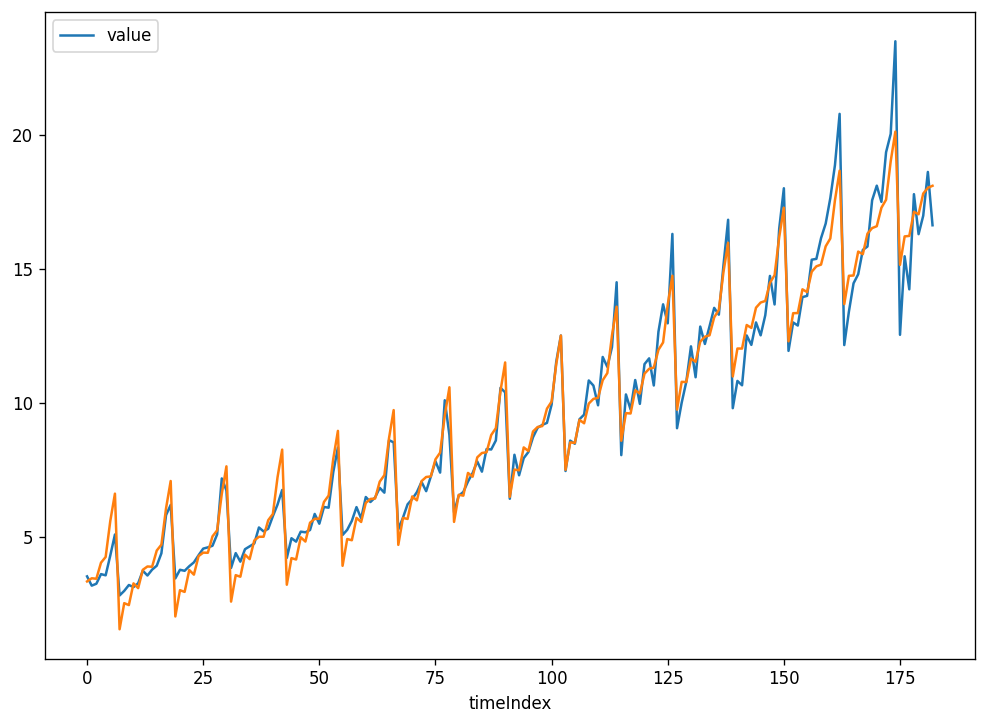

In [651]:
# Ploteamos los resultados de la predicción:

df_train.plot(kind = "line", x = "timeIndex", y = "value")
plt.plot(df_train.timeIndex, model_trend_est_pred_train, '-');

In [652]:
df_test = df_test.join(dummie_mes)

In [653]:
# Veamos las predicciones del modelo sobre el set de testeo:

model_trend_est_pred_test = model_trend_est.predict(df_test[["timeIndex", "timeIndex_sq",\
                                                               "Aug", "Dec", "Feb", "Jan",\
                                                                "Jul", "Jun",\
                                                                "Mar", "May", "Nov",\
                                                                "Oct", "Sep"]])
model_trend_est_pred_test[-5:]

date
2008-02-01    18.301071
2008-03-01    19.375696
2008-04-01    19.406029
2008-05-01    20.316308
2008-06-01    20.239601
dtype: float64

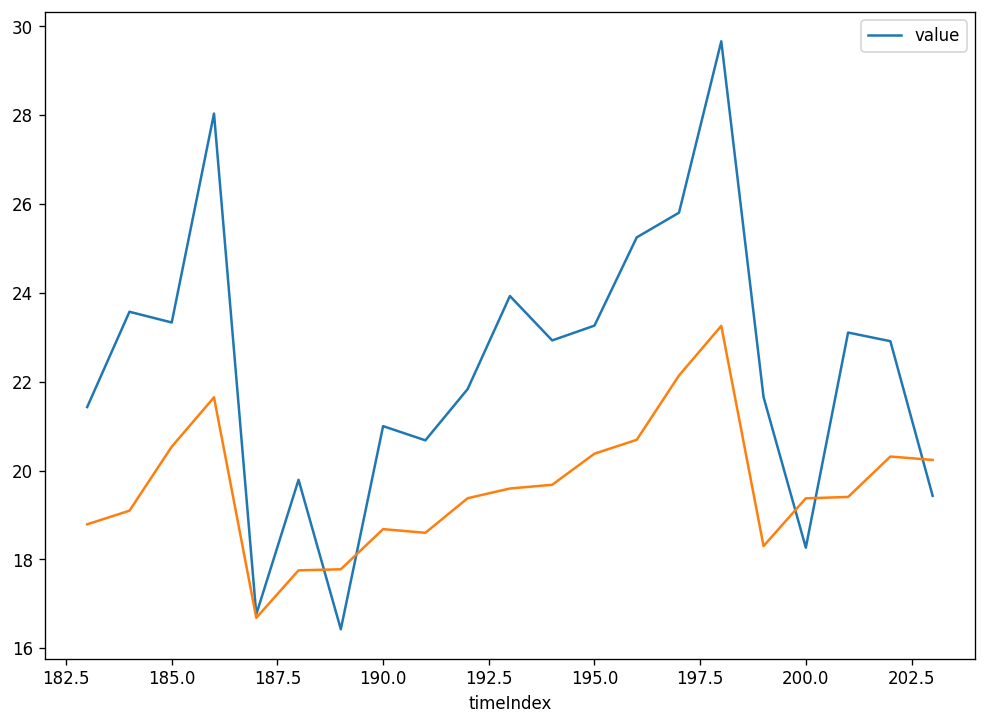

In [654]:
# Ploteamos los resultados de la predicción:

df_test.plot(kind = "line", x = "timeIndex", y = "value")
plt.plot(df_test.timeIndex, model_trend_est_pred_test, '-');

In [655]:
# Calculamos el error:

df_test["Trend_Est"] = model_trend_est_pred_test
df_test.head()

,value,MA_3,MA_15,year,month,Mean,valueShift1,RandomWalk,timeIndex,LinearTrend,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Trend_Est
date,,,,,,,,,,,,,,,,,,,,,
2006-10-01,21.430241,18.888591,17.731716,2006,Oct,9.358296,NaN,16.623343,183,16.749649,...,0,0,0,0,0,0,0,1,0,18.790256
2006-11-01,23.575517,20.543034,18.133104,2006,Nov,9.358296,21.430241,16.623343,184,16.829990,...,0,0,0,0,0,0,1,0,0,19.096761
2006-12-01,23.334206,22.779988,18.481993,2006,Dec,9.358296,23.575517,16.623343,185,16.910330,...,0,0,0,0,0,0,0,0,0,20.537774
2007-01-01,28.038383,24.982702,19.184774,2007,Jan,9.358296,23.334206,16.623343,186,16.990671,...,0,1,0,0,0,0,0,0,0,21.649291
2007-02-01,16.763869,22.712153,19.012548,2007,Feb,9.358296,28.038383,16.623343,187,17.071012,...,1,0,0,0,0,0,0,0,0,16.685700


In [656]:
model_trend_est_RMSE = RMSE(df_test.Trend_Est, df_test.value)
model_trend_est_RMSE

3.4078656210808997

In [657]:
# Añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior
df_Results.loc[4, "Model"] = "Trend_Est"
df_Results.loc[4, "RMSE"] = model_trend_est_RMSE
df_Results

,Model,RMSE
0,Mean,13.372576
1,Random Walk,6.558364
2,LinearTrend,5.760957
3,QuadraticTrend,4.270679
4,Trend_Est,3.407866


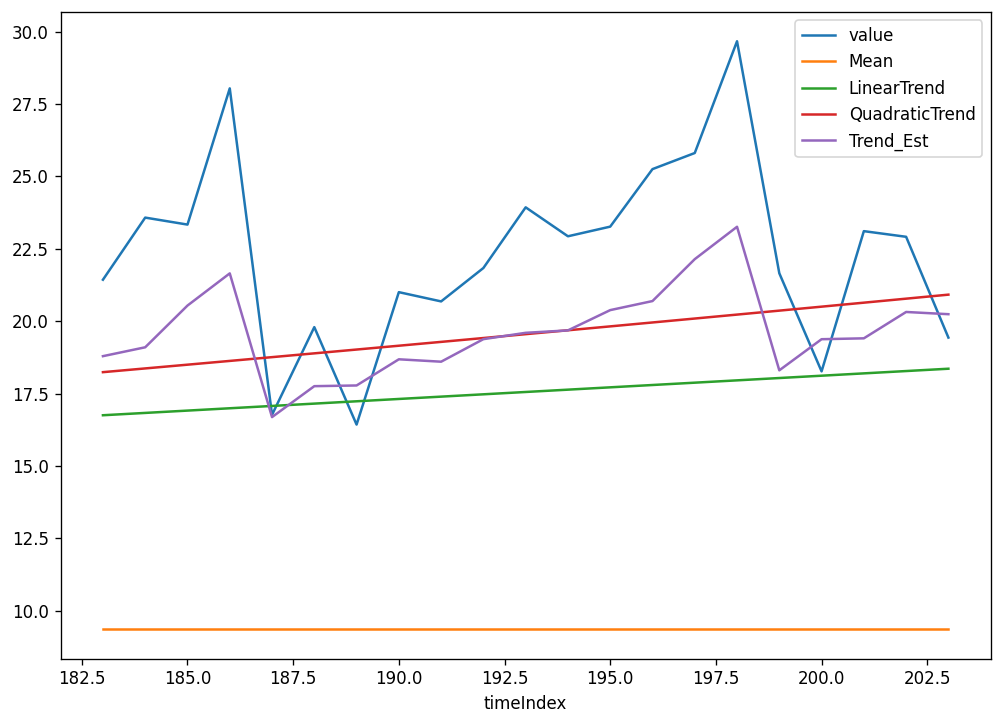

In [658]:
# Ploteamos todas las estimaciones
df_test.plot(kind = "line", x = "timeIndex", y = ["value", "Mean",
                                                 "LinearTrend", "QuadraticTrend",\
                                                 "Trend_Est"]);

## 3) Exponential Smoothing

#### Veamos que sucede si en lugar de ponderar los últimos $k$ valores, ponderamos todas las observaciones disponibles con ponderadores exponencialmene decrecientes a medida que nos movemos hacia atrás en el tiempo.

$$ \widehat{y_t} =\alpha . y_{t-1}  + (1 - \alpha ) . \widehat{y}_{t -1} $$

Aquí el modelo es un promedio ponderado entre el valor actual y el valor anterior del modelo.
𝛼  se conoce como smoothing factor.

In [659]:
# single exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model_exp_smoothing = SimpleExpSmoothing(df_train.value).fit(smoothing_level=0.3,\
                                                             optimized=False)

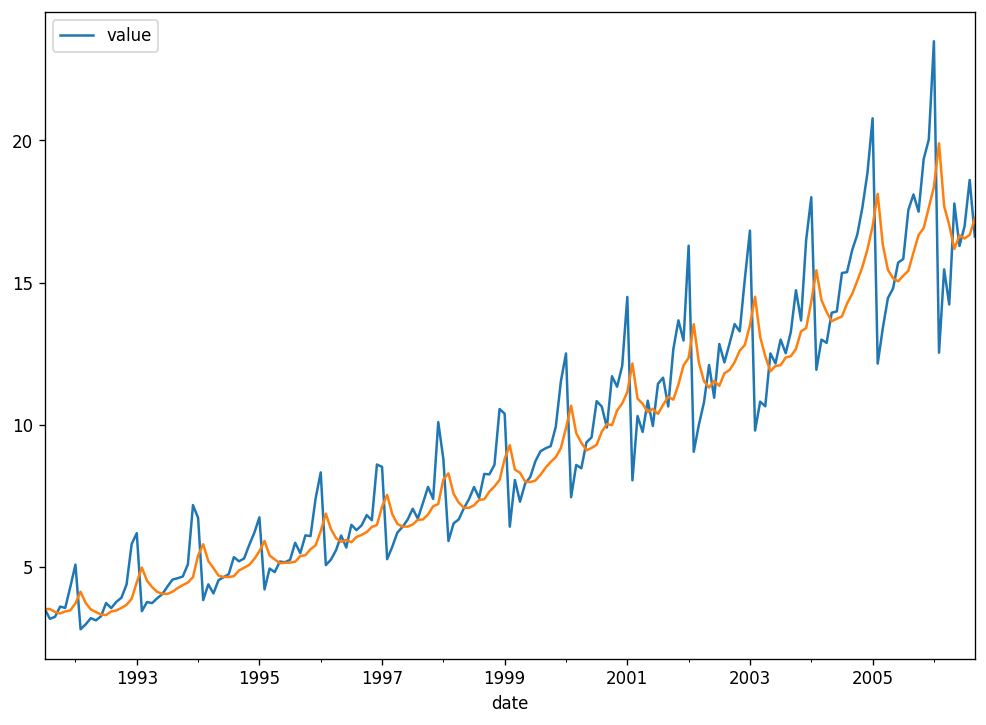

In [660]:
df_train.plot(kind = "line", y = "value")
model_exp_smoothing.fittedvalues.plot();

## Time Series Cross Validation 

#### Antes de comenzar a construir un modelo, veamos primero cómo estimar los parámetros del modelo automáticamente.

#### No hay nada inusual aquí; como siempre, tenemos que elegir una función de pérdida adecuada para la tarea que nos dirá qué tan cerca se aproxima el modelo a los datos. Luego, utilizando la validación cruzada, evaluaremos la función de pérdida elegida para los parámetros del modelo dados, calcularemos el gradiente, ajustaremos los parámetros del modelo, etc., eventualmente descendiendo al mínimo global.

#### Es posible que se pregunte cómo realizar una validación cruzada para series de tiempo porque las series de tiempo tienen esta estructura temporal y no se pueden mezclar los valores aleatoriamente en un pliegue mientras se conserva esta estructura. Con la aleatorización, se perderán todas las dependencias temporales entre las observaciones. Es por esto que tendremos que usar un enfoque más complicado para optimizar los parámetros del modelo. Utilizaremos es "cross validation on a rolling basis".

#### La idea es bastante simple: entrenamos nuestro modelo en un pequeño segmento de la serie de tiempo desde el principio hasta algunas t, hacemos predicciones para los siguientes t + n pasos y calculamos un error. Luego, expandimos nuestra muestra de entrenamiento a valor t + n, hacemos predicciones desde t + n hasta t + 2 ∗ n, y continuamos moviendo nuestro segmento de prueba de la serie de tiempo hasta que alcanzamos la última observación disponible. Como resultado, tenemos folds  como n cabrá entre la muestra de entrenamiento inicial y la última observación

![](ts_validation.png)

In [661]:
# Aplicamos un split entre train y test para series de tiempo:
from sklearn.model_selection import TimeSeriesSplit 

tscv = TimeSeriesSplit(n_splits=5)

In [662]:
for train_index, test_index in tscv.split(df_train):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32] TEST: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62] TEST: [63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86
 87 88 89 90 91 92]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92] TEST: [ 93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  

In [663]:
from sklearn.metrics import mean_squared_error

def timeseriesCVscore_exp_smoot(alpha, series):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=5) 
    
    # iterating over folds, train model on each, forecast and calculate error

    for train, test in tscv.split(values):
    
        model = SimpleExpSmoothing(values[train]).fit(smoothing_level=alpha,\
                                                             optimized=False)
        
        predictions = model.forecast(len(test))
        actual = values[test]
    
        error = mean_squared_error(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [664]:
alphas = [0.001, 0.01, 0.1, 0.2, 0.3, 0.35, 0.4, 0.5, 0.7]
errors = []

for alpha in alphas:
    error = timeseriesCVscore_exp_smoot(alpha, df_train.value)
    errors.append(error)

print('Alpha óptimo:', alphas[np.argmin(errors)])

Alpha óptimo: 0.3


In [665]:
# Entrenamos el modelo optimizado:

model_exp_smoothing = SimpleExpSmoothing(df_train.value).fit(smoothing_level=alphas[np.argmin(errors)],\
                                                             optimized=False)

In [666]:
df_test["Simple_Smoothing"] = model_exp_smoothing.forecast(21)
df_test.head()

,value,MA_3,MA_15,year,month,Mean,valueShift1,RandomWalk,timeIndex,LinearTrend,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Trend_Est,Simple_Smoothing
date,,,,,,,,,,,,,,,,,,,,,
2006-10-01,21.430241,18.888591,17.731716,2006,Oct,9.358296,NaN,16.623343,183,16.749649,...,0,0,0,0,0,0,1,0,18.790256,17.069501
2006-11-01,23.575517,20.543034,18.133104,2006,Nov,9.358296,21.430241,16.623343,184,16.829990,...,0,0,0,0,0,1,0,0,19.096761,17.069501
2006-12-01,23.334206,22.779988,18.481993,2006,Dec,9.358296,23.575517,16.623343,185,16.910330,...,0,0,0,0,0,0,0,0,20.537774,17.069501
2007-01-01,28.038383,24.982702,19.184774,2007,Jan,9.358296,23.334206,16.623343,186,16.990671,...,1,0,0,0,0,0,0,0,21.649291,17.069501
2007-02-01,16.763869,22.712153,19.012548,2007,Feb,9.358296,28.038383,16.623343,187,17.071012,...,0,0,0,0,0,0,0,0,16.685700,17.069501


In [667]:
model_simp_smo_RMSE = RMSE(df_test["Simple_Smoothing"], df_test.value)
model_simp_smo_RMSE

6.173494259721775

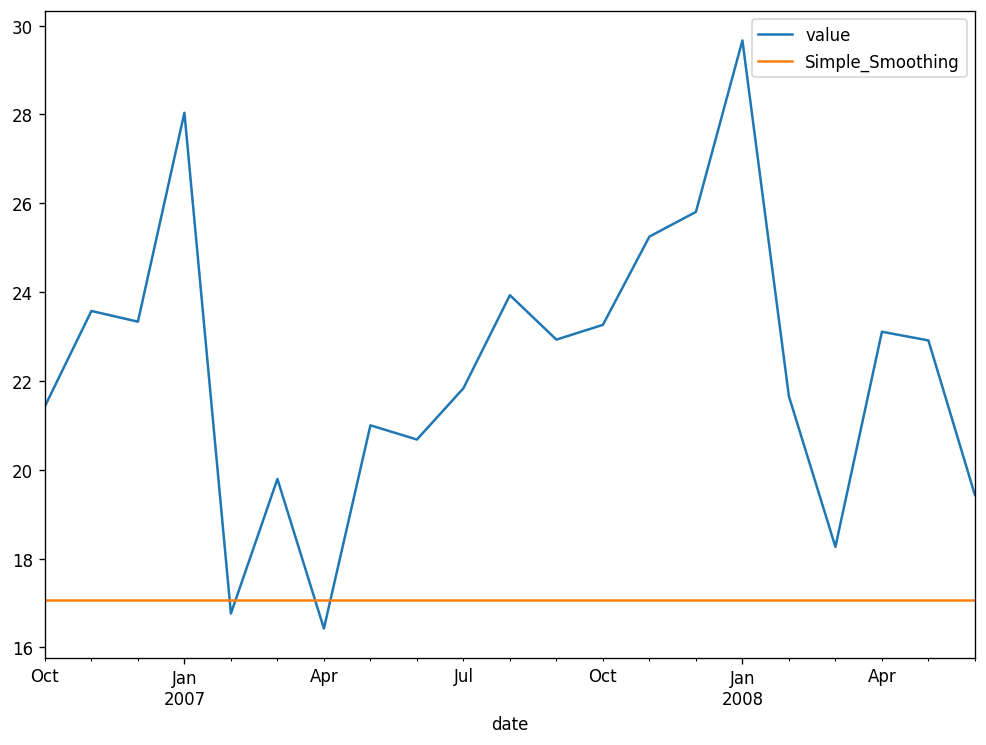

In [668]:
df_test.plot(kind="line", y = ["value", "Simple_Smoothing"]);

In [669]:
# Calculamos el RMSE y almacenamos los resultados
df_Results.loc[5, "Model"] = "Simple Smoothing"
df_Results.loc[5, "RMSE"] = RMSE(df_test["Simple_Smoothing"], df_test.value)
df_Results

,Model,RMSE
0,Mean,13.372576
1,Random Walk,6.558364
2,LinearTrend,5.760957
3,QuadraticTrend,4.270679
4,Trend_Est,3.407866
5,Simple Smoothing,6.173494


## Triple Exponential Smoothing Holt-Winters

#### La idea es agregar un tercer componente: la estacionalidad. Esto significa que no debemos usar este método si no se espera que nuestra serie de tiempo tenga estacionalidad. Los componentes estacionales en el modelo explicarán las variaciones repetidas alrededor del intercepto y la tendencia, y se especificarán por la duración de la temporada, en otras palabras, por el período después del cual las variaciones se repiten. Para cada observación en la temporada, hay un componente separado; por ejemplo, si la duración de la temporada es de 7 días (una estacionalidad semanal), tendremos 7 componentes estacionales, uno para cada día de la semana.

#### El intercepto ahora depende del valor actual de la serie menos cualquier componente estacional correspondiente. La tendencia permanece sin cambios, y el componente estacional depende del valor actual de la serie menos el intercepto y el valor anterior del componente. Tenga en cuenta que el componente se suaviza a través de todas las temporadas disponibles; por ejemplo, si tenemos un componente de lunes, entonces solo se promediará con otros lunes. . Ahora que tenemos el componente estacional, podemos predecir no solo uno o dos pasos por delante sino también un futuro arbitrario, lo que es muy alentador.

#### A continuación se muestra el código para un modelo de suavizado exponencial triple, que también se conoce por los apellidos de sus creadores, Charles Holt y su estudiante Peter Winters. Además, el método Brutlag se incluyó en el modelo para producir intervalos de confianza:

$$ \mathscr{C} = \alpha(y_{x} -s_{x-L}) + (1-\alpha)(\mathscr{C}_{x-1} + b_{x-1}) 
$$

$$ b_{x} = \beta( \mathscr{C}_{x} - \mathscr{C}_{x-1}) +(1-\beta)b_{x-1}
$$

$$s_{x} = \gamma( y_{x} - \mathscr{C}_{x}) +(1-\gamma)s_{x-L}
$$


$$\widehat{y}_{x+m} = \mathscr{C} + mb_{x} +s_{x-L+1+(m-1)modL}
$$

$$ \widehat{y}_{max_{x}} = \mathscr{C}_{x-1} + b_{x-1} + s_{x-T} + m . d_{t-T}
$$

$$ \widehat{y}_{min_{x}} = \mathscr{C}_{x-1} + b_{x-1} + s_{x-T} - m . d_{t-T}
$$

$$ d_t = \gamma  | y_t -  \widehat{y}_t|  + (1 - \gamma) d_{t-T}
$$

<h3><center> Donde $T$ es el largo de la temporada, $d$ es la desviación pronosticada  </center></h3>

In [670]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [671]:
class HoltWinters:
    
    """
    Modelo HoltWinters con el metodo Brutlag de deteccion de anomalias
    
    # series - initial time series
    # slen   - tamaño de la temporada
    # alpha, beta, gamma - coeficientes del modelo Holt-Winters
    # n_preds - predictions horizon
    # scaling_factor - ancho del intervalo de confianza Brutlag (usualmente de 2 a 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        
        self.series = series
        self.slen   = slen
        
        self.alpha  = alpha
        self.beta   = beta
        self.gamma  = gamma
        
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        
        return seasonals   

          
    def triple_exponential_smoothing(self):
        
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [672]:
def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=12):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [673]:
from scipy.optimize import minimize

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(df_train.value, mean_squared_log_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x

print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(df_train.value, 
                    slen = 12, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 21, 
                    scaling_factor = 3)

model.triple_exponential_smoothing()

0.30181527442726785 0.08612887290939164 0.9998959802533322


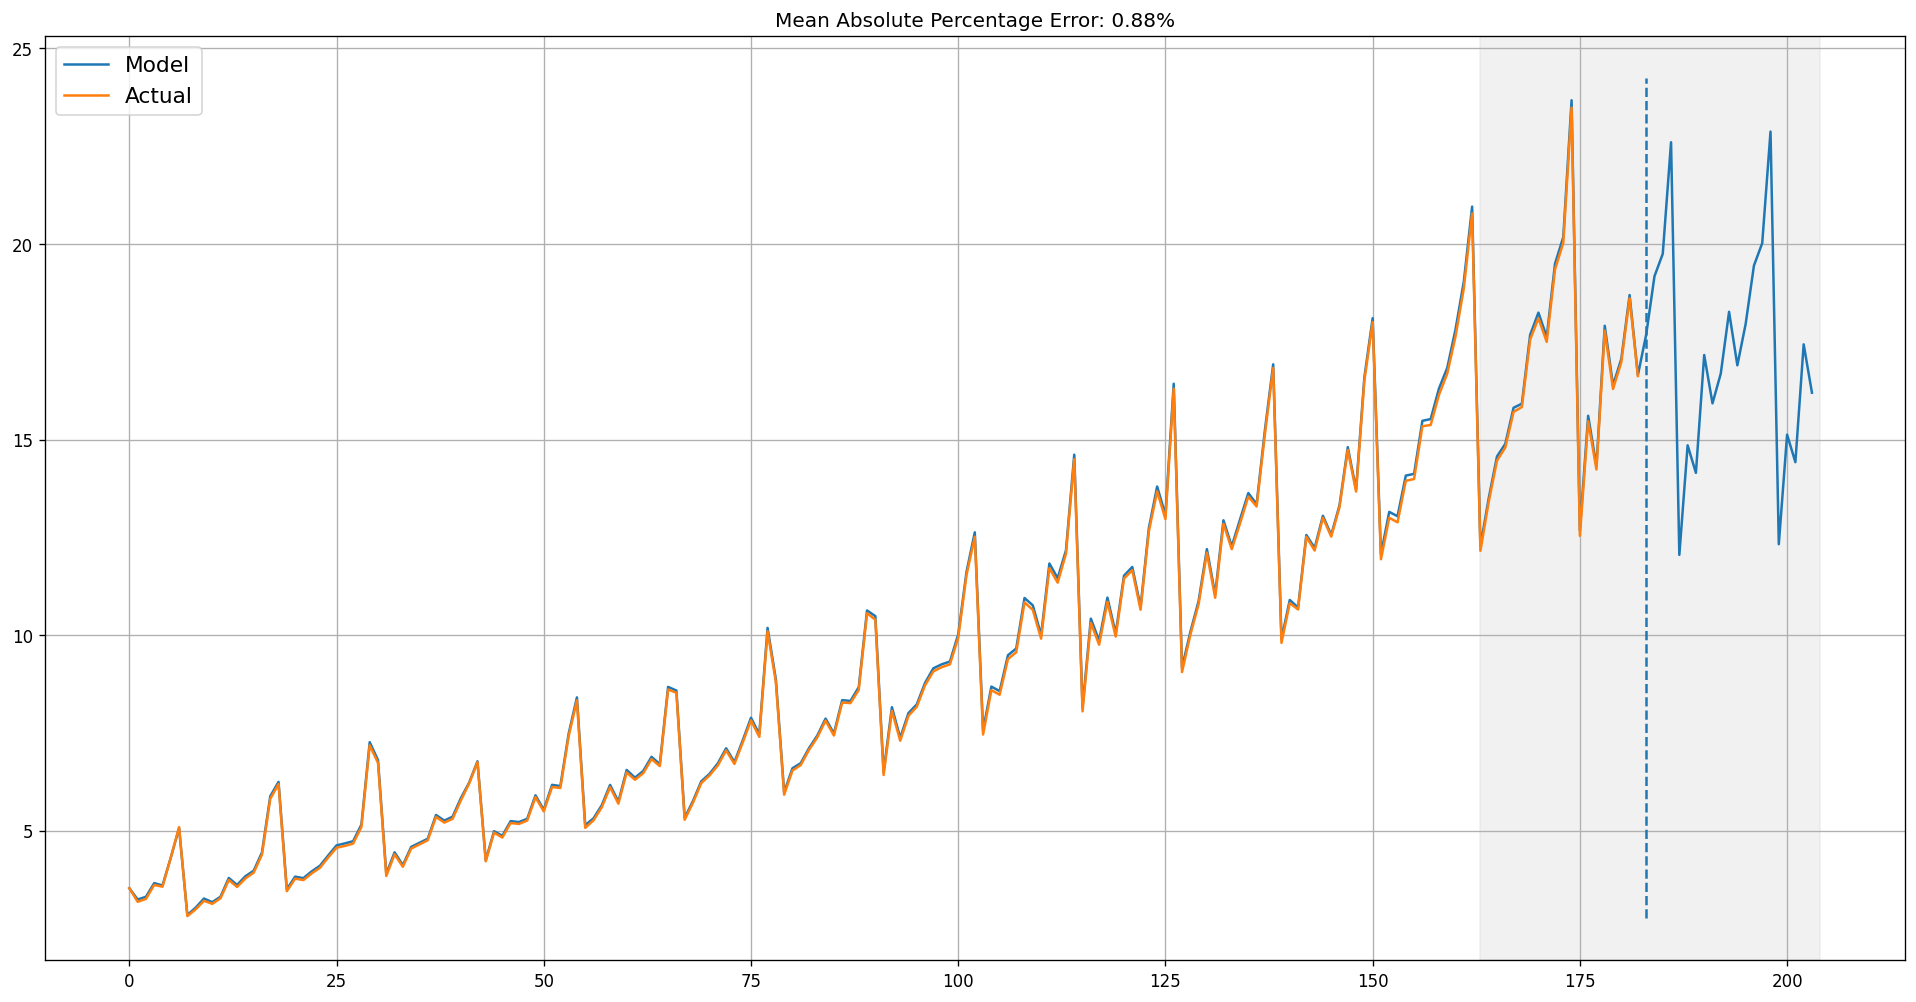

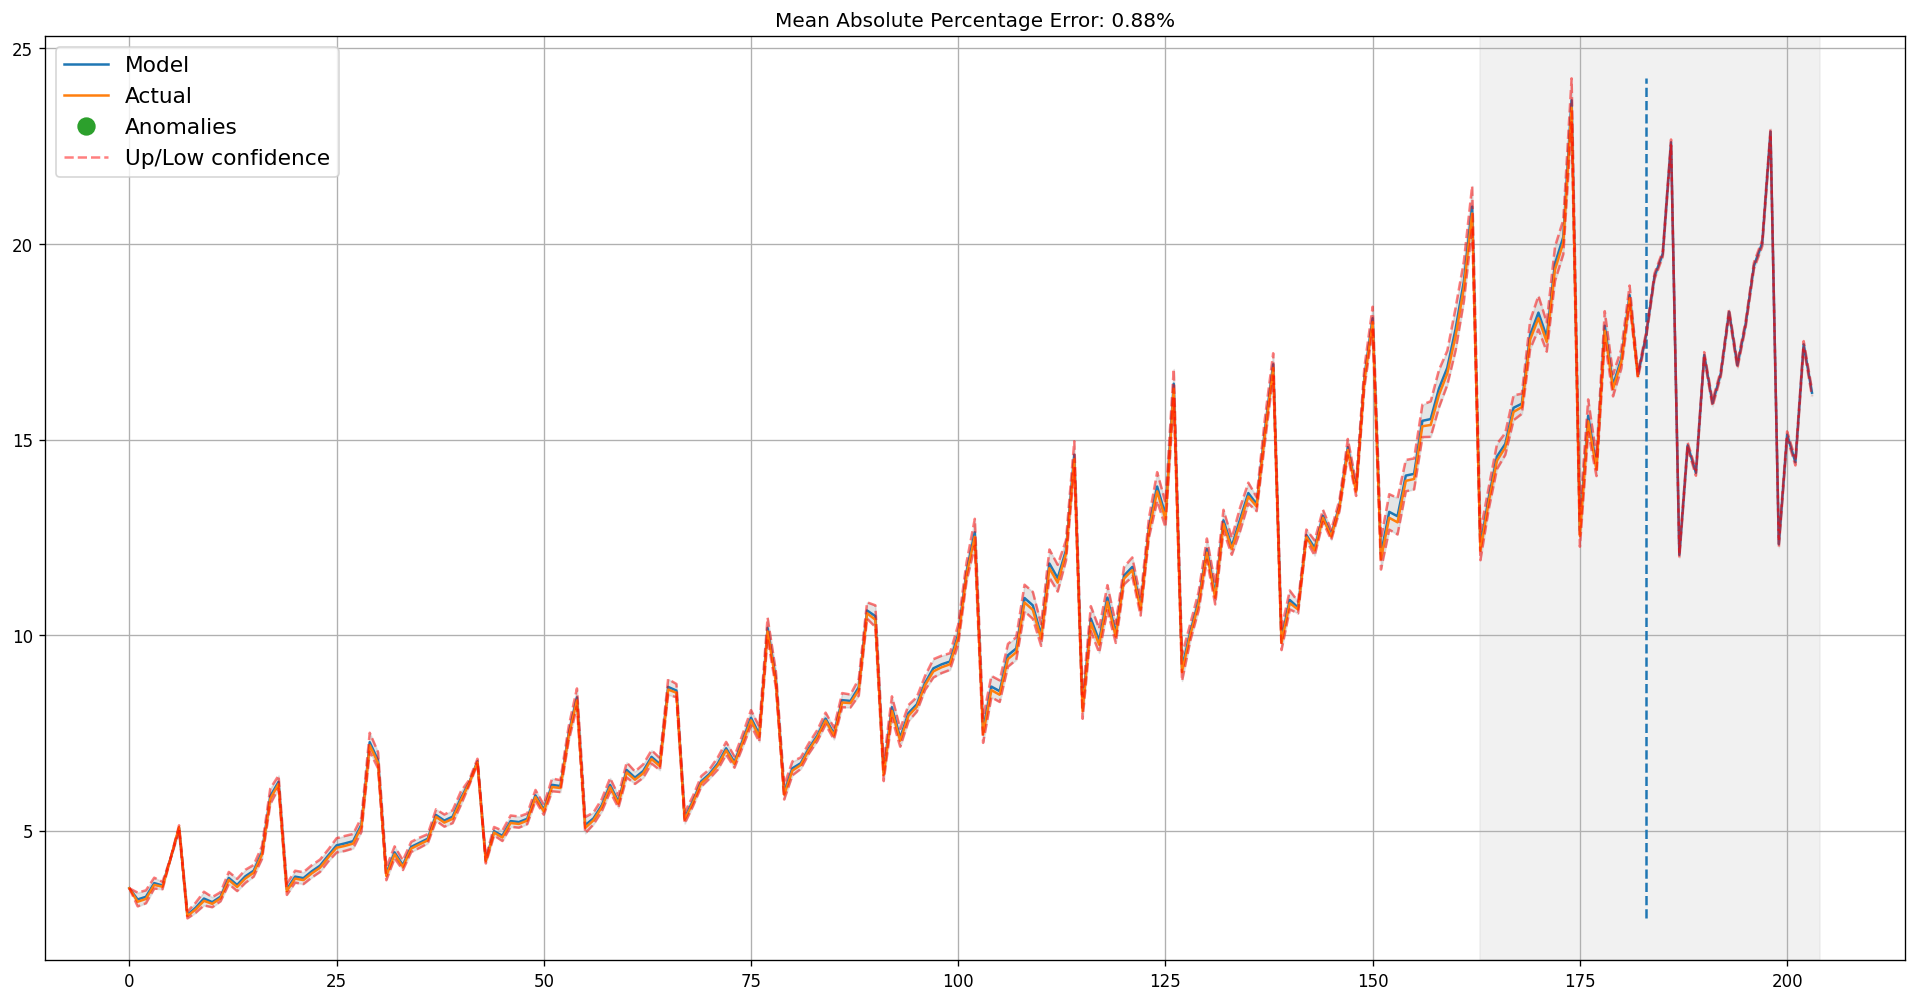

In [674]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - graficar intervalos de confianza
        plot_anomalies - graficar ouliers
    """
    
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);
    
plotHoltWinters(df_train.value)
plotHoltWinters(df_train.value, plot_intervals=True, plot_anomalies=True)

In [675]:
model.result[-21:]

[17.681253418911442,
 19.173300784770053,
 19.748082193144914,
 22.600262915594804,
 12.050024885751867,
 14.851118967703776,
 14.14769132600566,
 17.16046865979763,
 15.923919876293377,
 16.686713665723836,
 18.264465689949738,
 16.896122521360734,
 17.953869601158495,
 19.445916967017105,
 20.020698375391966,
 22.87287909784186,
 12.32264106799892,
 15.123735149950829,
 14.420307508252712,
 17.433084842044682,
 16.19653605854043]

In [676]:
df_test["Holt-Winters"] = model.result[-21:]
df_test.head()

,value,MA_3,MA_15,year,month,Mean,valueShift1,RandomWalk,timeIndex,LinearTrend,...,Jul,Jun,Mar,May,Nov,Oct,Sep,Trend_Est,Simple_Smoothing,Holt-Winters
date,,,,,,,,,,,,,,,,,,,,,
2006-10-01,21.430241,18.888591,17.731716,2006,Oct,9.358296,NaN,16.623343,183,16.749649,...,0,0,0,0,0,1,0,18.790256,17.069501,17.681253
2006-11-01,23.575517,20.543034,18.133104,2006,Nov,9.358296,21.430241,16.623343,184,16.829990,...,0,0,0,0,1,0,0,19.096761,17.069501,19.173301
2006-12-01,23.334206,22.779988,18.481993,2006,Dec,9.358296,23.575517,16.623343,185,16.910330,...,0,0,0,0,0,0,0,20.537774,17.069501,19.748082
2007-01-01,28.038383,24.982702,19.184774,2007,Jan,9.358296,23.334206,16.623343,186,16.990671,...,0,0,0,0,0,0,0,21.649291,17.069501,22.600263
2007-02-01,16.763869,22.712153,19.012548,2007,Feb,9.358296,28.038383,16.623343,187,17.071012,...,0,0,0,0,0,0,0,16.685700,17.069501,12.050025


In [677]:
model_HoltWinters_RMSE = RMSE(df_test["Holt-Winters"], df_test.value)
model_HoltWinters_RMSE

5.409396173370083

In [678]:
# Calculamos el RMSE y almacenamos los resultados
df_Results.loc[6, "Model"] = "Holt-Winters"
df_Results.loc[6, "RMSE"] = RMSE(df_test["Holt-Winters"], df_test.value)
df_Results

,Model,RMSE
0,Mean,13.372576
1,Random Walk,6.558364
2,LinearTrend,5.760957
3,QuadraticTrend,4.270679
4,Trend_Est,3.407866
5,Simple Smoothing,6.173494
6,Holt-Winters,5.409396


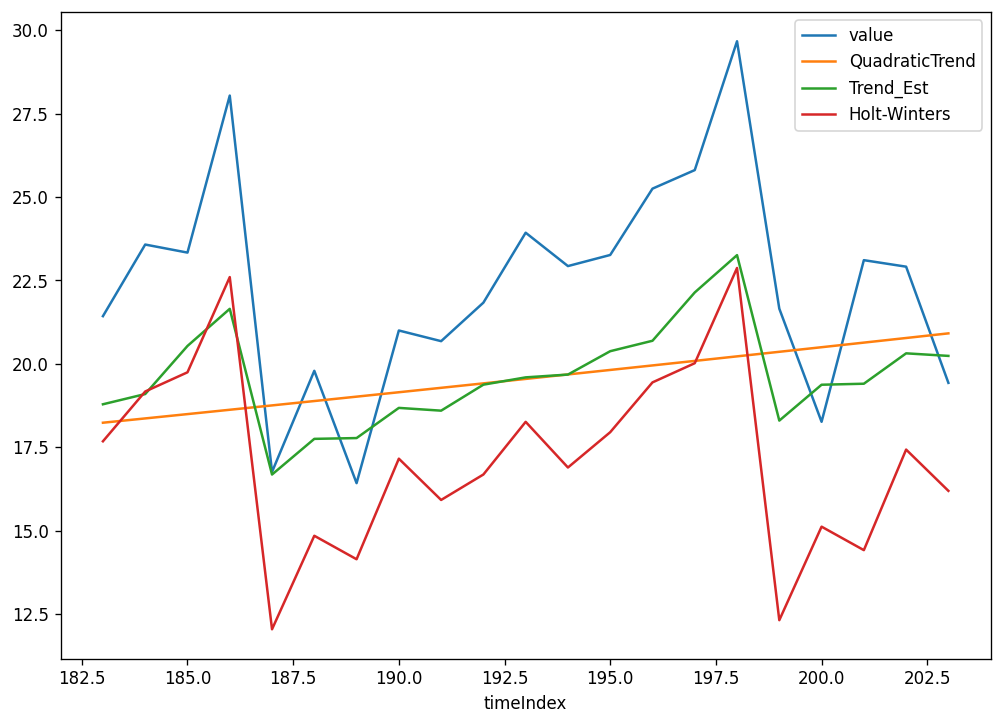

In [679]:
# Ploteamos las mejores estimaciones 
df_test.plot(kind = "line", x = "timeIndex", y = ["value", "QuadraticTrend",\
                                                 "Trend_Est", "Holt-Winters"]);

***

### Ejercicio CO2 

sm.datasets.co2 es un módulo de la librería Statsmodels en Python que contiene un conjunto de datos relacionado con las emisiones de dióxido de carbono (CO2) en la atmósfera. Este conjunto de datos se obtuvo de la Base de datos de la Mauna Loa Observatory en Hawái, que recolecta datos de las emisiones de CO2 desde 1959. El conjunto de datos contiene la concentración de CO2 en partes por millón (ppm) medida cada mes.

https://www.statsmodels.org/dev/datasets/generated/co2.html

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

dataset = sm.datasets.co2.load_pandas()
co2 = dataset.data
co2

In [ ]:
# Sustituimos los huecos por valores próximos
co2['co2'].fillna(method='ffill', inplace=True)

# fecha como índice
# co2.index = pd.DatetimeIndex(co2.index)

# La función resample() se utiliza para cambiar la frecuencia de muestreo de los datos en el dataframe.
# El argumento "MS" indica que se quiere resamplear los datos a una frecuencia mensual.
# 'MS' argument indicates that the data should be resampled by month (M) and the start (S) of the month.
# La función mean() es utilizada para calcular el promedio de los datos en el dataframe resampleado.
y = co2['co2'].resample('MS').mean()
# plt.plot(y)

# Para que la descomposición dé valores no nulos en trend, se añade este parámetro: extrapolate_trend='freq'
decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,20))

plt.subplot(411)
plt.plot(co2, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [ ]:
co2trend = pd.DataFrame(trend)
co2trend

In [ ]:
# Agrupar por año y promediar los valores
co2trend = co2trend.resample('Y').mean()
co2trend

***

### Emisiones del hombre

https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv

In [ ]:
emissions = pd.read_csv('owid-co2-data.csv')
emissions

In [ ]:
emissions = emissions[["year", "co2"]]
emissions

In [ ]:
emissions = emissions.groupby(by="year").sum()
emissions

In [ ]:
plt.plot(emissions)

In [ ]:
# Recorta desde 1958
emissions = emissions[208:]
plt.plot(emissions)

In [ ]:
# fecha como índice
# emissions.index = pd.DatetimeIndex(emissions.index)
emissions.index = pd.to_datetime(emissions.index, format='%Y') # Convertir índice que sólo tiene el año en índice de fecha
emissions

In [ ]:
decomposition = sm.tsa.seasonal_decompose(emissions, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,20))

plt.subplot(411)
plt.plot(emissions, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [ ]:
# Factor de escala para comparar tendencias
co2trendScaled = co2trend * 300
co2trendScaled

In [ ]:
plt.plot(co2trendScaled)
plt.plot(emissionsMA)
plt.legend(['co2 natural', 'emisiones'])
plt.show()

In [ ]:
# Otra fuente más extensa en el tiempo
# https://datahub.io/core/co2-ppm
co2ext = pd.read_csv("co2-annmean-mlo_csv.csv")
co2ext["co2"] = co2ext["Mean"]
co2ext.index = pd.DatetimeIndex(co2ext.Year)
co2ext = co2ext[["co2"]]
co2ext

In [ ]:
plt.plot(co2ext)

In [ ]:
# Dibujamos 3 dataframes en una sola gráfica con 3 escalas diferentes
# Creamos una figura y dos ejes en ella
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Utilizamos el primer eje para graficar el primer dataframe con una escala
ax1.plot(co2trend, 'b-')
ax1.set_xlabel('Año')
ax1.set_ylabel('CO2 natural', color='b')

# Utilizamos el segundo eje para graficar el segundo dataframe con otra escala
ax2.plot(emissions, 'r-')
ax2.set_ylabel('CO2 emitido', color='r')

# Tercer eje
ax3.plot(co2ext, 'g-')
ax3.set_ylabel('CO2 natural extendido', color='g')

plt.show()

In [ ]:
# 2 primeros
# Creamos una figura y dos ejes en ella
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Utilizamos el primer eje para graficar el primer dataframe con una escala
ax1.plot(co2trend, 'b-')
ax1.set_xlabel('Año')

# Utilizamos el segundo eje para graficar el segundo dataframe con otra escala
ax2.plot(emissions, 'r-')
ax2.set_ylabel('CO2 emitido', color='r')

plt.show()

In [ ]:
# 2 últimos
# Creamos una figura y dos ejes en ella
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Utilizamos el primer eje para graficar el primer dataframe con una escala
ax1.plot(co2ext, 'b-')
ax1.set_xlabel('Año')
ax1.set_ylabel('CO2 natural extendido', color='b')

# Utilizamos el segundo eje para graficar el segundo dataframe con otra escala
ax2.plot(emissions, 'r-')
ax2.set_ylabel('CO2 emitido', color='r')

plt.show()

In [ ]:
# INTENTO FALLIDO DE Graficar dos dataframes en una sola gráfica con dos escalas diferentes utilizando la librería seaborn:
import seaborn as sns

# sns.lineplot() para graficar el primer dataframe en un eje, utilizando una escala.
sns.lineplot(y="trend", data=co2trend)

# especificar que se grafique en el mismo eje utilizando el parámetro ax y
# especificando el eje actual plt.gca() y utilizar el parámetro secondary_y=True:
sns.lineplot(y="co2", data=emissions, ax=plt.gca())

# Personaliza las etiquetas y títulos de tus ejes y gráfica
plt.xlabel('X')
plt.ylabel('Y1')
plt.ylabel('Y2')

plt.title("Gráfica de dos dataframes en una sola gráfica con dos escalas diferentes")

plt.show()

In [ ]:
# Moving Average = 3
emissionsMA = emissions.rolling(window=6).mean()

In [ ]:
# 2 últimos con promedio
# Creamos una figura y dos ejes en ella
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Utilizamos el primer eje para graficar el primer dataframe con una escala
ax1.plot(co2ext, 'b-')
ax1.set_xlabel('Año')
ax1.set_ylabel('CO2 natural extendido', color='b')

# Utilizamos el segundo eje para graficar el segundo dataframe con otra escala
ax2.plot(emissionsMA, 'r-')
ax2.set_ylabel('CO2 emitido', color='r')

plt.show()

In [ ]:
# 2 últimos con promedio y diff
# Creamos una figura y dos ejes en ella
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Utilizamos el primer eje para graficar el primer dataframe con una escala
ax1.plot(co2ext.diff(), 'b-')
ax1.set_xlabel('Año')
ax1.set_ylabel('Delta CO2 natural extendido', color='b')

# Utilizamos el segundo eje para graficar el segundo dataframe con otra escala
ax2.plot(emissionsMA.diff(), 'r-')
ax2.set_ylabel('Delta CO2 emitido', color='r')

plt.show()

In [ ]:
emissionsMA

In [ ]:
# Crear dataframe a partir de emissionsMA.index para la columna x y emissionsMA.diff() para la columna y
# df = pd.DataFrame({"x": emissionsMA.index, "y": emissionsMA.diff()})
# df.dtype()
# # Dibujar regresión lineal con seaborn del dataframe data
# sns.regplot(x='x', y='y', data=df)
sns.regplot(x=emissionsMA.index, y=emissionsMA.co2.diff())
# plt.show()

In [ ]:
# regresión lineal
from sklearn.linear_model import LinearRegression

# Instanciamos el modelo
linreg = LinearRegression()

# Entrenamos el modelo
x = emissionsMA.index
y = emissionsMA.co2.diff()
linreg.fit(x, y)

# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

In [ ]:
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit
# y = b + m * x
b, m = polyfit(emissionsMA.index, emissionsMA.co2.diff(), 1)

plt.scatter(emissionsMA.index, emissionsMA.co2.diff(), s=0.3)
plt.scatter(emissionsMA.co2.diff(), b + m * emissionsMA.index, s=1, color="red")

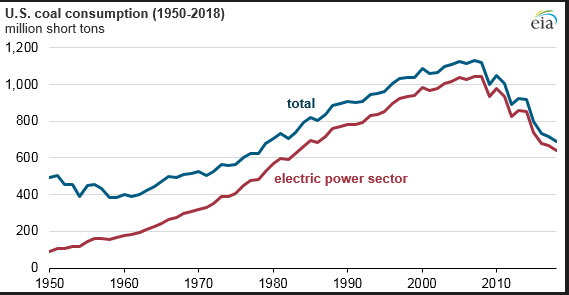

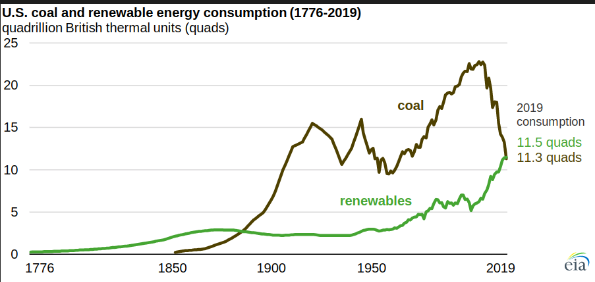